In [ ]:
import pandas as pd

df = pd.read_csv("E:/fall 25_26/machinr/final project/Smart-Student-Performance-Prediction-System/Term_Project_Dataset_20K.csv")
df.head()


age  gender  parent_income  num_siblings  family_support  \
0  24.0  Female        22678.0           0.0             1.0   
1  21.0    Male        17905.0           3.0             2.0   
2  28.0    Male            NaN           0.0             0.0   
3  25.0  Female        29391.0           4.0             4.0   
4  22.0    Male        15522.0           0.0             4.0   

   commute_time_min part_time_job  previous_gpa  num_failed_courses  \
0              95.0            No          2.22                 3.0   
1               0.0           Yes          3.78                 1.0   
2              67.0            No           NaN                 4.0   
3              83.0           Yes          1.84                 4.0   
4              58.0           Yes          3.38                 0.0   

   high_school_grade  ...  concentration_level  exam_anxiety_level  \
0               99.7  ...                  7.0                 6.0   
1               75.7  ...                  3.0                 3.0   
2               93.4  ...                  1.0                 8.0   
3               69.7  ...                  6.0                10.0   
4               62.2  ...                 10.0                 5.0   

   course_difficulty_rating  teacher_experience_years  class_size  \
0                       2.0                      11.0        95.0   
1                       1.0                       NaN       148.0   
2                       1.0                      32.0        55.0   
3                       5.0                      30.0        42.0   
4                       3.0                      31.0       123.0   

   num_prerequisites  course_type  final_score  final_grade  pass_fail  
0                3.0     Elective          NaN            C       Pass  
1                2.0     Elective         81.7            C       Pass  
2                3.0     Elective         77.3            B       Pass  
3                1.0    Mandatory         78.5            B       Pass  
4                1.0    Mandatory         60.3            D       Pass  

[5 rows x 41 columns]


# Initial Data Exploration


In [7]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame (df.info()):")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

print("\nNumber of unique values for each column:")
print(df.nunique())

print("\nCount of missing values for each column:")
print(df.isnull().sum())

First 5 rows of the DataFrame:
    age  gender  parent_income  num_siblings  family_support  \
0  24.0  Female        22678.0           0.0             1.0   
1  21.0    Male        17905.0           3.0             2.0   
2  28.0    Male            NaN           0.0             0.0   
3  25.0  Female        29391.0           4.0             4.0   
4  22.0    Male        15522.0           0.0             4.0   

   commute_time_min part_time_job  previous_gpa  num_failed_courses  \
0              95.0            No          2.22                 3.0   
1               0.0           Yes          3.78                 1.0   
2              67.0            No           NaN                 4.0   
3              83.0           Yes          1.84                 4.0   
4              58.0           Yes          3.38                 0.0   

   high_school_grade  ...  concentration_level  exam_anxiety_level  \
0               99.7  ...                  7.0                 6.0   
1               7

# Visualize Feature Distributions

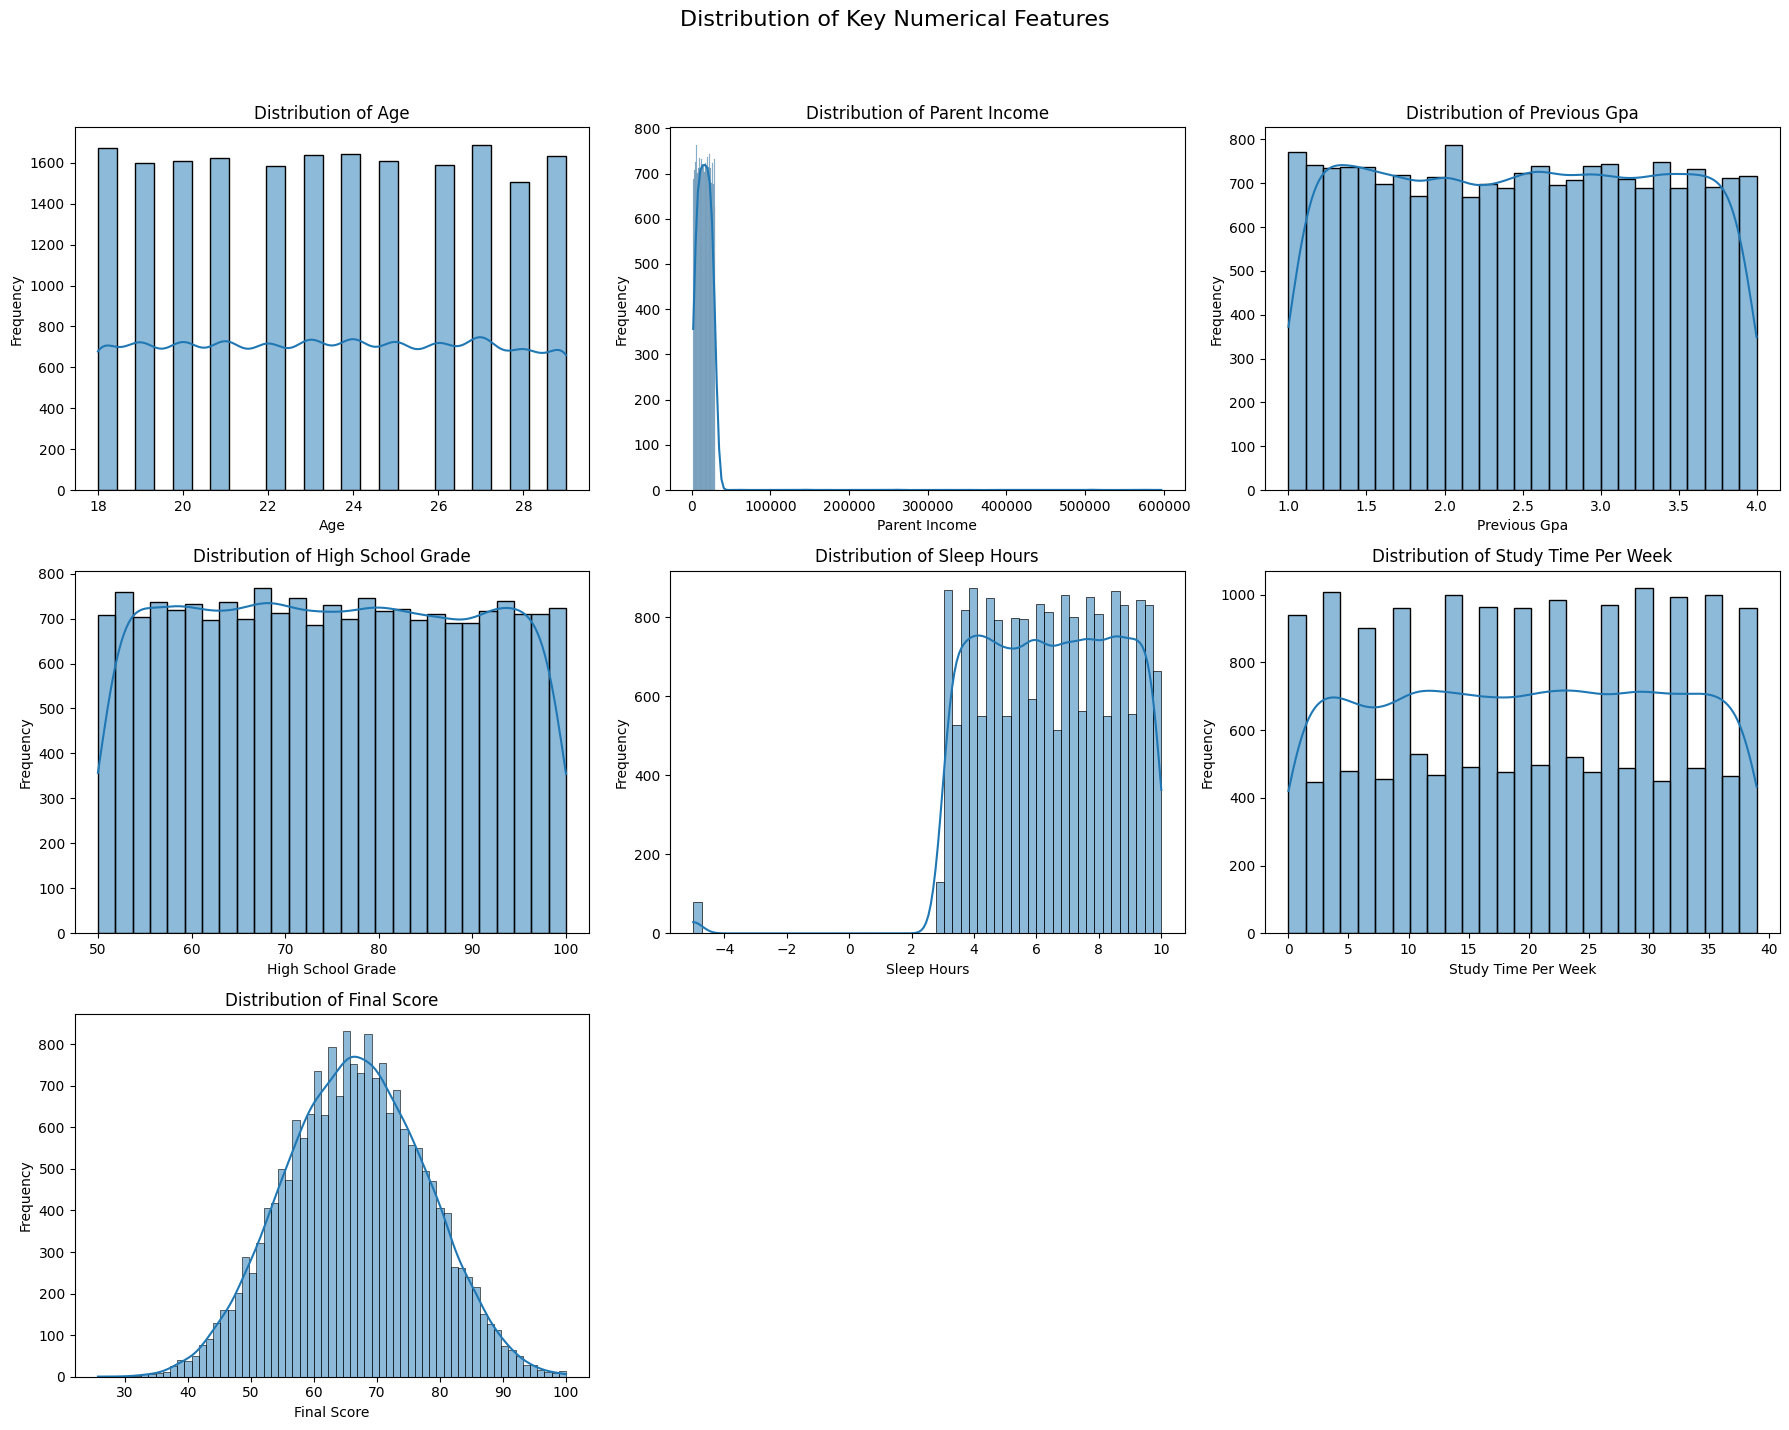

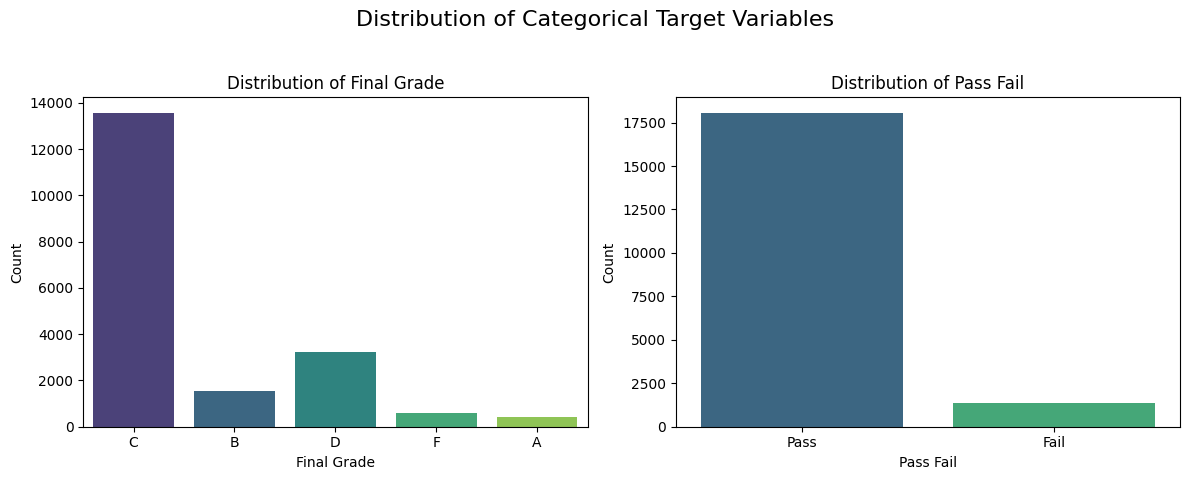

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for a selection of key numerical features
numerical_features = [
    'age', 'parent_income', 'previous_gpa', 'high_school_grade',
    'sleep_hours', 'study_time_per_week', 'final_score'
]

# Calculate number of rows and columns for subplots
n_cols_num = 3 # this can be adjusted for better layout
n_rows_num = (len(numerical_features) + n_cols_num - 1) // n_cols_num

plt.figure(figsize=(18, 5 * n_rows_num))
plt.suptitle('Distribution of Key Numerical Features', fontsize=16)

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows_num, n_cols_num, i + 1)
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

# Count plots for categorical target variables
categorical_targets = ['final_grade', 'pass_fail']

n_cols_cat = 2
n_rows_cat = (len(categorical_targets) + n_cols_cat - 1) // n_cols_cat

plt.figure(figsize=(12, 5 * n_rows_cat))
plt.suptitle('Distribution of Categorical Target Variables', fontsize=16)

for i, feature in enumerate(categorical_targets):
    plt.subplot(n_rows_cat, n_cols_cat, i + 1)
    sns.countplot(data=df, x=feature, palette='viridis', hue=feature, legend=False)
    plt.title(f'Distribution of {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analyze Correlations

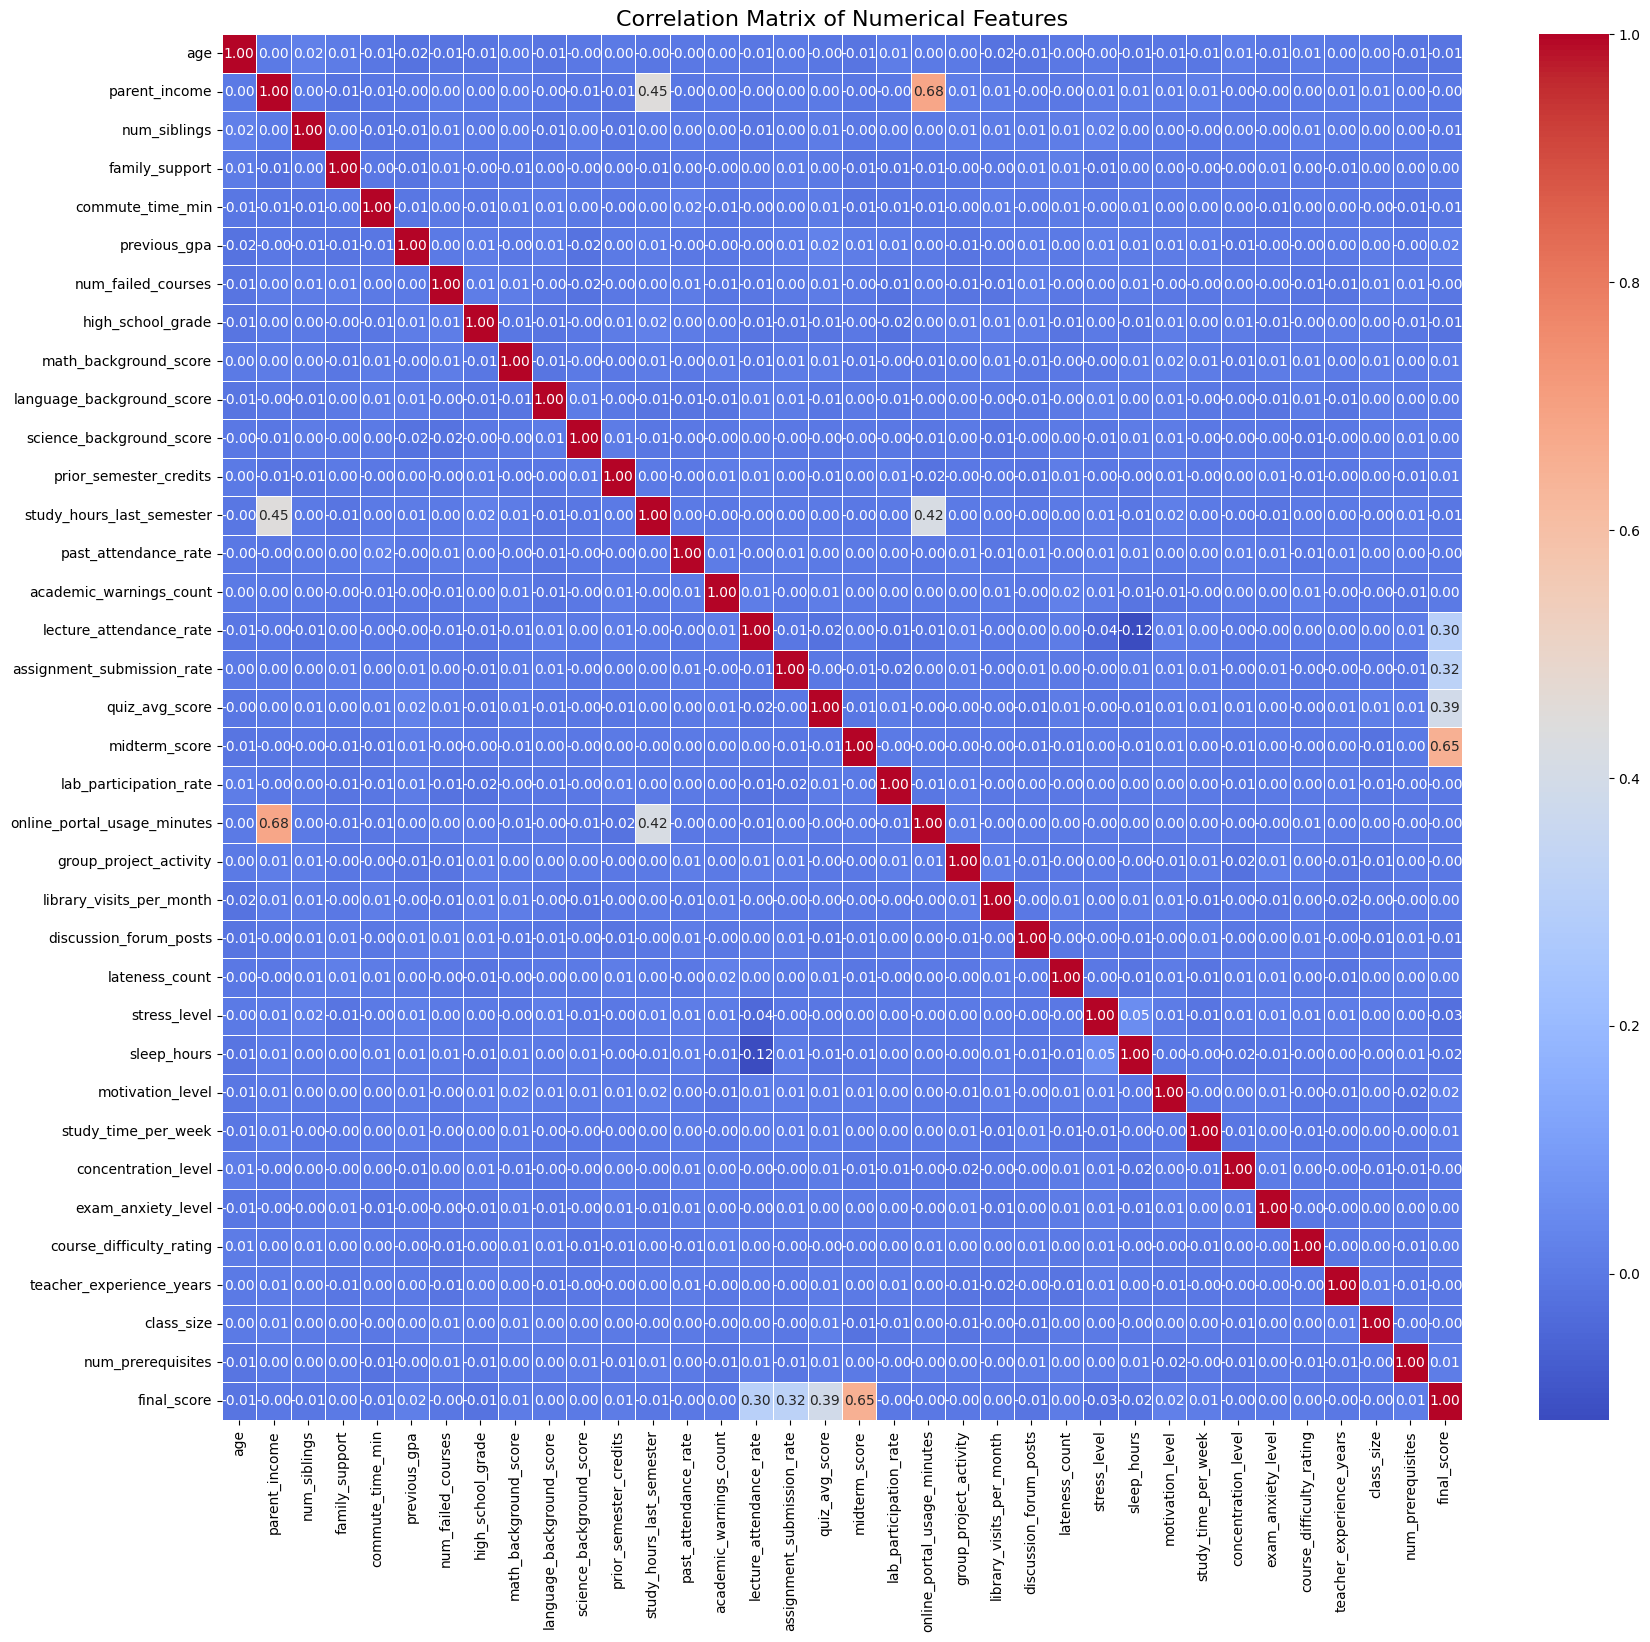

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 18)) # Adjust figure size for better readability

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add a title to the heatmap
plt.title('Correlation Matrix of Numerical Features', fontsize=16)

# Display the plot
plt.show()

# Handle Missing Values

In [ ]:
print("Number of missing values per row (top 10):")
print(df.isnull().sum(axis=1).value_counts().head(10))

# Identify rows where all columns are missing
initial_rows = df.shape[0]
all_null_rows = df[df.isnull().all(axis=1)]
print(f"\nNumber of rows with all columns missing: {len(all_null_rows)}")

# If 600 rows are completely null, drop them
if len(all_null_rows) == 600:
    df.dropna(how='all', inplace=True)
    print(f"Dropped {initial_rows - df.shape[0]} rows with all missing values.")

# Verify that there are no remaining missing values
print("\nUpdated count of missing values for each column:")
print(df.isnull().sum())

Number of missing values per row (top 10):
1    7266
0    5761
2    4446
3    1862
4     505
5     133
6      20
7       5
8       2
Name: count, dtype: int64

Number of rows with all columns missing: 0

Updated count of missing values for each column:
age                            600
gender                         600
parent_income                  600
num_siblings                   600
family_support                 600
commute_time_min               600
part_time_job                  600
previous_gpa                   600
num_failed_courses             600
high_school_grade              600
math_background_score          600
language_background_score      600
science_background_score       600
prior_semester_credits         600
study_hours_last_semester      600
past_attendance_rate           600
academic_warnings_count        600
lecture_attendance_rate        600
assignment_submission_rate     600
quiz_avg_score                 600
midterm_score                  600
lab_particip

In [ ]:
import numpy as np

# Identify numerical and categorical columns with missing values
numerical_cols_with_na = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()
categorical_cols_with_na = df.select_dtypes(include='object').columns[df.select_dtypes(include='object').isnull().any()].tolist()

print("Numerical columns with missing values:", numerical_cols_with_na)
print("Categorical columns with missing values:", categorical_cols_with_na)

# Handle the anomalous 'sleep_hours' by replacing negative values with NaN
# This ensures that imputation uses valid sleep hour values.
initial_anomalies = df[df['sleep_hours'] < 0].shape[0]
if initial_anomalies > 0:
    df.loc[df['sleep_hours'] < 0, 'sleep_hours'] = np.nan
    print(f"\nReplaced {initial_anomalies} anomalous negative 'sleep_hours' with NaN.")

# Impute numerical columns with the median
for col in numerical_cols_with_na:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    # print(f"Imputed numerical column '{col}' with median: {median_val}")

# Impute categorical columns with the mode
for col in categorical_cols_with_na:
    mode_val = df[col].mode()[0] # .mode() can return multiple if frequencies are tied, take the first
    df[col] = df[col].fillna(mode_val)
    # print(f"Imputed categorical column '{col}' with mode: {mode_val}")

# Verify that there are no remaining missing values
print("\nUpdated count of missing values for each column after imputation:")
print(df.isnull().sum().to_string()) # Using to_string() for full output


Numerical columns with missing values: ['age', 'parent_income', 'num_siblings', 'family_support', 'commute_time_min', 'previous_gpa', 'num_failed_courses', 'high_school_grade', 'math_background_score', 'language_background_score', 'science_background_score', 'prior_semester_credits', 'study_hours_last_semester', 'past_attendance_rate', 'academic_warnings_count', 'lecture_attendance_rate', 'assignment_submission_rate', 'quiz_avg_score', 'midterm_score', 'lab_participation_rate', 'online_portal_usage_minutes', 'group_project_activity', 'library_visits_per_month', 'discussion_forum_posts', 'lateness_count', 'stress_level', 'sleep_hours', 'motivation_level', 'study_time_per_week', 'concentration_level', 'exam_anxiety_level', 'course_difficulty_rating', 'teacher_experience_years', 'class_size', 'num_prerequisites', 'final_score']
Categorical columns with missing values: ['gender', 'part_time_job', 'course_type', 'final_grade', 'pass_fail']

Replaced 79 anomalous negative 'sleep_hours' with 

# Identify and Remove Outliers

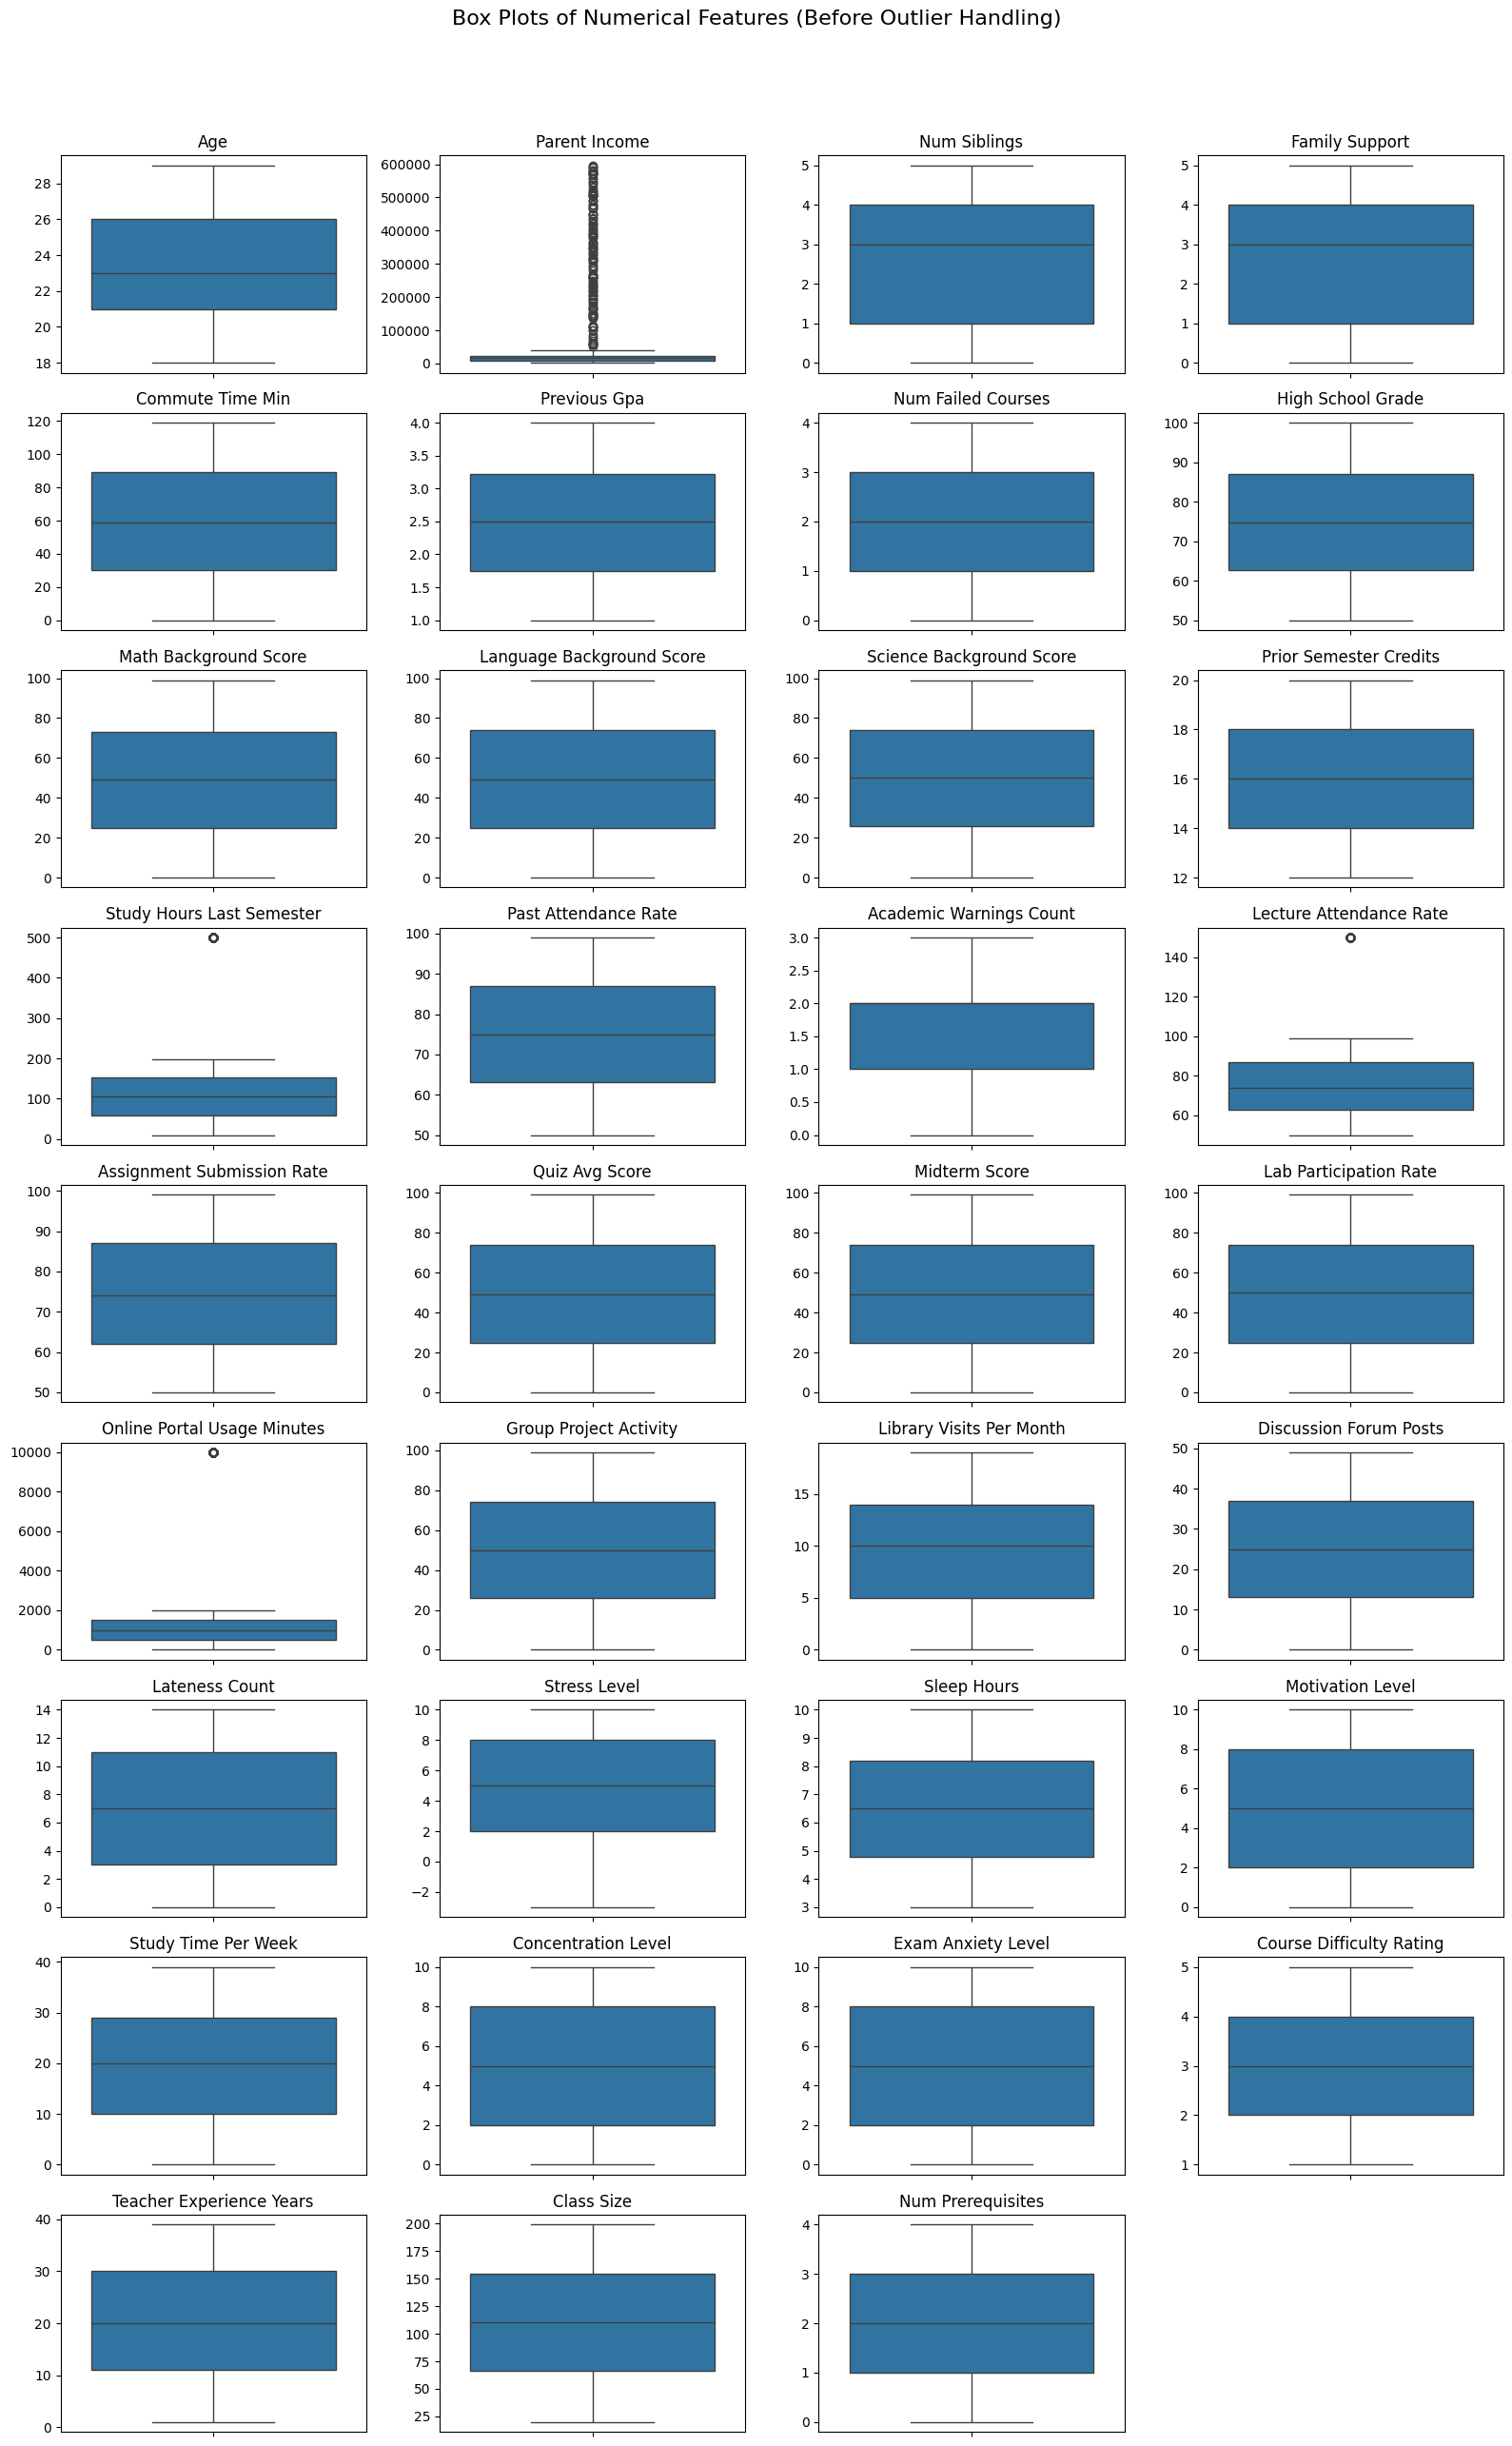

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude target variables if they are not to be treated for outliers (e.g., 'final_score' will be treated later)
# Also exclude columns that are essentially categorical or have a very small range, where 'outliers' might be valid categories
# based on the previous identification of potentially noisy/irrelevant features and descriptive statistics

# Define columns for which to generate initial box plots
plot_numerical_cols = [col for col in numerical_cols if col not in ['final_score', 'final_grade', 'pass_fail']]

# Calculate number of rows and columns for subplots dynamically
n_cols = 4 # Adjust for desired layout
n_rows = (len(plot_numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle('Box Plots of Numerical Features (Before Outlier Handling)', fontsize=16)

for i, col in enumerate(plot_numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col.replace("_", " ").title()}')
    plt.ylabel('') # Remove y-label to avoid clutter

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
plt.show()

Capped outliers for 'parent_income': Lower bound=-11041.12, Upper bound=43229.88
Capped outliers for 'study_hours_last_semester': Lower bound=-83.00, Upper bound=293.00
Capped outliers for 'online_portal_usage_minutes': Lower bound=-955.00, Upper bound=2965.00
Capped outliers for 'academic_warnings_count': Lower bound=-0.50, Upper bound=3.50
Capped outliers for 'midterm_score': Lower bound=-48.50, Upper bound=147.50
Capped outliers for 'final_score': Lower bound=36.75, Upper bound=96.35
Capped outliers for 'sleep_hours': Lower bound=-0.30, Upper bound=13.30

Outlier capping applied to specified numerical features.


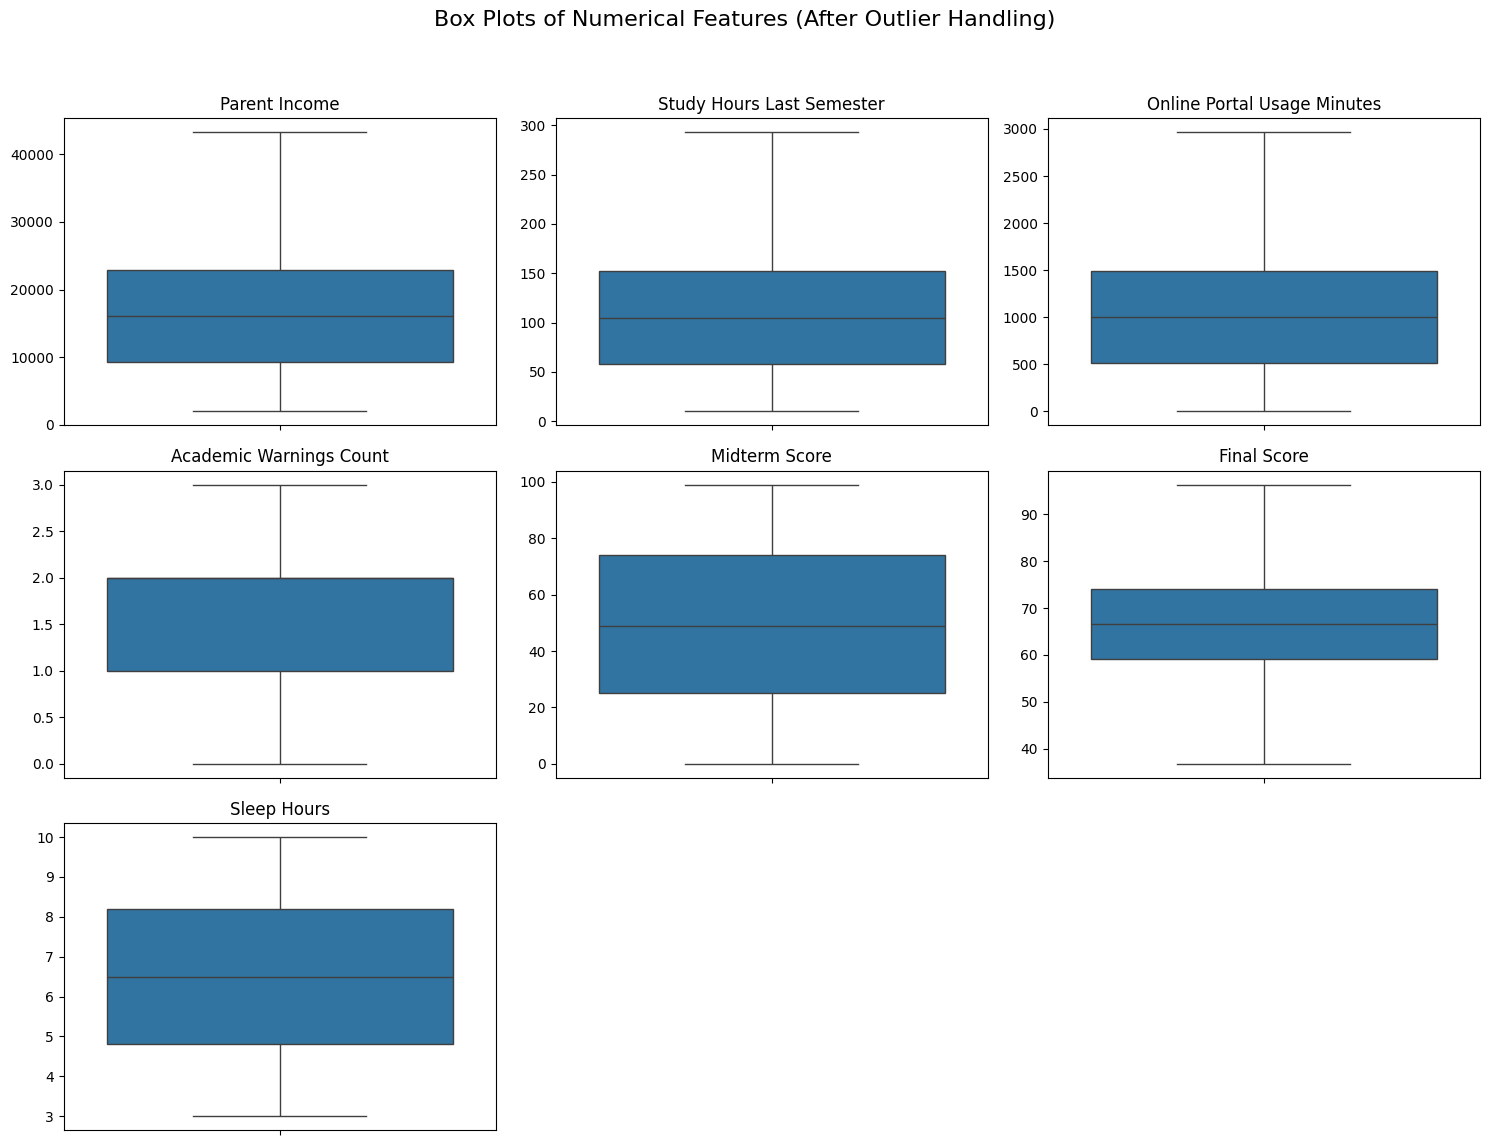


Descriptive statistics for features after outlier capping:
       parent_income  study_hours_last_semester  online_portal_usage_minutes  academic_warnings_count  midterm_score   final_score   sleep_hours
count   20000.000000               20000.000000                 20000.000000             20000.000000   20000.000000  20000.000000  20000.000000
mean    16209.308550                 105.884100                  1011.984550                 1.521950      49.628000     66.542285      6.499980
std      8247.107079                  56.452403                   592.529656                 1.106743      28.516516     10.860196      1.989297
min      2000.000000                  10.000000                     0.000000                 0.000000       0.000000     36.750000      3.000000
25%      9310.500000                  58.000000                   515.000000                 1.000000      25.000000     59.100000      4.800000
50%     16102.000000                 105.000000                  1004.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to apply IQR capping
outlier_columns = [
    'parent_income',
    'study_hours_last_semester',
    'online_portal_usage_minutes',
    'academic_warnings_count',
    'midterm_score',
    'final_score',
    'sleep_hours' # Already handled negative, now check for other extremes
]

# Function to apply IQR capping
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Capped outliers for '{col}': Lower bound={lower_bound:.2f}, Upper bound={upper_bound:.2f}")
    return df

# Apply capping to the identified columns
for col in outlier_columns:
    df = cap_outliers_iqr(df.copy(), col)

print("\nOutlier capping applied to specified numerical features.")

# Verify changes: Re-plot box plots for capped columns
n_cols_verify = 3 # Adjust for desired layout
n_rows_verify = (len(outlier_columns) + n_cols_verify - 1) // n_cols_verify

plt.figure(figsize=(n_cols_verify * 5, n_rows_verify * 4))
plt.suptitle('Box Plots of Numerical Features (After Outlier Handling)', fontsize=16)

for i, col in enumerate(outlier_columns):
    plt.subplot(n_rows_verify, n_cols_verify, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col.replace("_", " ").title()}')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Verify changes: Display descriptive statistics for capped columns
print("\nDescriptive statistics for features after outlier capping:")
print(df[outlier_columns].describe().to_string())

# Encode Categorical Features

In [ ]:
import pandas as pd

# Identify all categorical columns that are not target variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Exclude target variables ('final_grade', 'pass_fail')
# 'final_score' is numerical, so it's not in categorical_cols
nominal_features = [col for col in categorical_cols if col not in ['final_grade', 'pass_fail']]

print(f"Categorical features identified for one-hot encoding: {nominal_features}")

# Apply one-hot encoding for nominal categorical features
df_encoded = pd.get_dummies(df, columns=nominal_features, drop_first=True, dtype=int)

print("\nFirst 5 rows of the DataFrame after one-hot encoding:")
print(df_encoded.head())

print("\nConcise summary of the DataFrame after one-hot encoding (df_encoded.info()):")
df_encoded.info()

Categorical features identified for one-hot encoding: ['gender', 'part_time_job', 'course_type']

First 5 rows of the DataFrame after one-hot encoding:
    age  parent_income  num_siblings  family_support  commute_time_min  \
0  24.0        22678.0           0.0             1.0              95.0   
1  21.0        17905.0           3.0             2.0               0.0   
2  28.0        16102.0           0.0             0.0              67.0   
3  25.0        29391.0           4.0             4.0              83.0   
4  22.0        15522.0           0.0             4.0              58.0   

   previous_gpa  num_failed_courses  high_school_grade  math_background_score  \
0          2.22                 3.0               99.7                   34.0   
1          3.78                 1.0               75.7                   91.0   
2          2.50                 4.0               93.4                   32.0   
3          1.84                 4.0               69.7                   33.0  

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order for 'final_grade'
grade_order = ['F', 'D', 'C', 'B', 'A']

# Define the order for 'pass_fail'
pass_fail_order = ['Fail', 'Pass']

# Create OrdinalEncoder instances with specified categories
encoder_grade = OrdinalEncoder(categories=[grade_order], dtype=int)
encoder_pass_fail = OrdinalEncoder(categories=[pass_fail_order], dtype=int)

# Apply ordinal encoding to 'final_grade' and 'pass_fail'
df_encoded['final_grade_encoded'] = encoder_grade.fit_transform(df_encoded[['final_grade']])
df_encoded['pass_fail_encoded'] = encoder_pass_fail.fit_transform(df_encoded[['pass_fail']])

# Drop the original categorical columns for 'final_grade' and 'pass_fail'
df_encoded.drop(columns=['final_grade', 'pass_fail'], inplace=True)

print("First 5 rows of the DataFrame after ordinal encoding:")
print(df_encoded.head())

print("\nConcise summary of the DataFrame after ordinal encoding (df_encoded.info()):")
df_encoded.info()

First 5 rows of the DataFrame after ordinal encoding:
    age  parent_income  num_siblings  family_support  commute_time_min  \
0  24.0        22678.0           0.0             1.0              95.0   
1  21.0        17905.0           3.0             2.0               0.0   
2  28.0        16102.0           0.0             0.0              67.0   
3  25.0        29391.0           4.0             4.0              83.0   
4  22.0        15522.0           0.0             4.0              58.0   

   previous_gpa  num_failed_courses  high_school_grade  math_background_score  \
0          2.22                 3.0               99.7                   34.0   
1          3.78                 1.0               75.7                   91.0   
2          2.50                 4.0               93.4                   32.0   
3          1.84                 4.0               69.7                   33.0   
4          3.38                 0.0               62.2                   89.0   

   language_ba

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features for scaling. Exclude the encoded target variables.
# 'final_score' is the numerical target variable, 'final_grade_encoded' and 'pass_fail_encoded' are also targets.

# Get all columns except the target variables (final_score, final_grade_encoded, pass_fail_encoded)
# and the one-hot encoded binary features (gender_Male, part_time_job_Yes, course_type_Mandatory)

# First, identify all numerical columns in the current df_encoded DataFrame
all_numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude target variables from scaling
target_variables = ['final_score', 'final_grade_encoded', 'pass_fail_encoded']

# Also exclude binary columns created by one-hot encoding, as they don't typically need scaling
binary_cols = ['gender_Male', 'part_time_job_Yes', 'course_type_Mandatory']

features_to_scale = [col for col in all_numerical_cols if col not in target_variables and col not in binary_cols]

print(f"Features to be scaled: {features_to_scale}")

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the identified features
df_scaled_features = df_encoded[features_to_scale].copy()
df_scaled_features = pd.DataFrame(scaler.fit_transform(df_scaled_features), columns=features_to_scale, index=df_encoded.index)

# Replace original feature columns with scaled ones in the main DataFrame
for col in features_to_scale:
    df_encoded[col] = df_scaled_features[col]

print("\nFirst 5 rows of the DataFrame after feature scaling:")
print(df_encoded.head())

print("\nConcise summary of the DataFrame after feature scaling (df_encoded.info()):")
df_encoded.info()

Features to be scaled: ['age', 'parent_income', 'num_siblings', 'family_support', 'commute_time_min', 'previous_gpa', 'num_failed_courses', 'high_school_grade', 'math_background_score', 'language_background_score', 'science_background_score', 'prior_semester_credits', 'study_hours_last_semester', 'past_attendance_rate', 'academic_warnings_count', 'lecture_attendance_rate', 'assignment_submission_rate', 'quiz_avg_score', 'midterm_score', 'lab_participation_rate', 'online_portal_usage_minutes', 'group_project_activity', 'library_visits_per_month', 'discussion_forum_posts', 'lateness_count', 'stress_level', 'sleep_hours', 'motivation_level', 'study_time_per_week', 'concentration_level', 'exam_anxiety_level', 'course_difficulty_rating', 'teacher_experience_years', 'class_size', 'num_prerequisites']

First 5 rows of the DataFrame after feature scaling:
        age  parent_income  num_siblings  family_support  commute_time_min  \
0  0.157420       0.784378     -1.492292       -0.901293      

# Train/Validation/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) for final_score regression
X = df_encoded.drop(columns=['final_score', 'final_grade_encoded', 'pass_fail_encoded'])
y = df_encoded['final_score']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Second split: 15% validation, 15% test from the 30% temp data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(f"\nTraining set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set shape: X={X_val.shape}, y={y_val.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")

Shape of features (X): (20000, 38)
Shape of target (y): (20000,)

Training set shape: X=(14000, 38), y=(14000,)
Validation set shape: X=(3000, 38), y=(3000,)
Test set shape: X=(3000, 38), y=(3000,)


# Train Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


# Evaluate Linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the validation set
y_pred_lr = linear_reg_model.predict(X_val)

# Calculate evaluation metrics
mse_lr = mean_squared_error(y_val, y_pred_lr)
mae_lr = mean_absolute_error(y_val, y_pred_lr)
r2_lr = r2_score(y_val, y_pred_lr)

# Print the evaluation metrics
print(f"Linear Regression Model Performance on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"R-squared (R2) Score: {r2_lr:.4f}")

Linear Regression Model Performance on Validation Set:
Mean Squared Error (MSE): 31.9640
Mean Absolute Error (MAE): 4.3801
R-squared (R2) Score: 0.7276


# Train Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest Regressor model
# Using default parameters for initial training
random_forest_reg_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
random_forest_reg_model.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

Random Forest Regressor model trained successfully.


# Evaluate Random Forest Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the validation set
y_pred_rf = random_forest_reg_model.predict(X_val)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_val, y_pred_rf)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Print the evaluation metrics
print(f"Random Forest Regressor Model Performance on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"R-squared (R2) Score: {r2_rf:.4f}")

Random Forest Regressor Model Performance on Validation Set:
Mean Squared Error (MSE): 32.9034
Mean Absolute Error (MAE): 4.5118
R-squared (R2) Score: 0.7196


# Train XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

# Instantiate the XGBoost Regressor model
xgb_reg_model = XGBRegressor(random_state=42)

# Fit the model to the training data
xgb_reg_model.fit(X_train, y_train)

print("XGBoost Regressor model trained successfully.")

XGBoost Regressor model trained successfully.


# Evaluate XGBoost Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the validation set
y_pred_xgb = xgb_reg_model.predict(X_val)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost Regressor Model Performance on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"R-squared (R2) Score: {r2_xgb:.4f}")

XGBoost Regressor Model Performance on Validation Set:
Mean Squared Error (MSE): 35.4358
Mean Absolute Error (MAE): 4.6833
R-squared (R2) Score: 0.6980


#Train k-Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the k-Nearest Neighbors Regressor model
# Using n_neighbors=5 as a starting point
knn_reg_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg_model.fit(X_train, y_train)

print("k-Nearest Neighbors Regressor model trained successfully.")

k-Nearest Neighbors Regressor model trained successfully.


# Evaluate k-Nearest Neighbors Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the validation set
y_pred_knn = knn_reg_model.predict(X_val)

# Calculate evaluation metrics
mse_knn = mean_squared_error(y_val, y_pred_knn)
mae_knn = mean_absolute_error(y_val, y_pred_knn)
r2_knn = r2_score(y_val, y_pred_knn)

# Print the evaluation metrics
print(f"k-Nearest Neighbors Regressor Model Performance on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_knn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_knn:.4f}")
print(f"R-squared (R2) Score: {r2_knn:.4f}")

k-Nearest Neighbors Regressor Model Performance on Validation Set:
Mean Squared Error (MSE): 65.5397
Mean Absolute Error (MAE): 6.5302
R-squared (R2) Score: 0.4415


# Train Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

# Instantiate the Support Vector Regressor model
# SVR does not have a random_state parameter directly for its fitting process
svr_model = SVR(kernel='rbf')

# Fit the model to the training data
svr_model.fit(X_train, y_train)

print("Support Vector Regressor model trained successfully.")

Support Vector Regressor model trained successfully.


# Evaluate Support Vector Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the validation set
y_pred_svr = svr_model.predict(X_val)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_val, y_pred_svr)
mae_svr = mean_absolute_error(y_val, y_pred_svr)
r2_svr = r2_score(y_val, y_pred_svr)

# Print the evaluation metrics
print(f"Support Vector Regressor Model Performance on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_svr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_svr:.4f}")
print(f"R-squared (R2) Score: {r2_svr:.4f}")

Support Vector Regressor Model Performance on Validation Set:
Mean Squared Error (MSE): 32.6419
Mean Absolute Error (MAE): 4.4937
R-squared (R2) Score: 0.7219


# Train Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the Gradient Boosting Regressor model
gradient_boosting_reg_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gradient_boosting_reg_model.fit(X_train, y_train)

print("Gradient Boosting Regressor model trained successfully.")

Gradient Boosting Regressor model trained successfully.


# Evaluate Gradient Boosting Regressor

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Make predictions on the validation set using the Gradient Boosting Regressor model
y_pred_gbr = gradient_boosting_reg_model.predict(X_val)

# Calculate evaluation metrics for Gradient Boosting Regressor
mse_gbr = mean_squared_error(y_val, y_pred_gbr)
mae_gbr = mean_absolute_error(y_val, y_pred_gbr)
r2_gbr = r2_score(y_val, y_pred_gbr)

# Print the evaluation metrics
print(f"Gradient Boosting Regressor Model Performance on Validation Set:")
print(f"Mean Squared Error (MSE): {mse_gbr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:.4f}")
print(f"R-squared (R2) Score: {r2_gbr:.4f}")

# Update the performance summary DataFrame with the new model's metrics
new_model_performance = pd.DataFrame({
    'Model': ['Gradient Boosting Regressor'],
    'MSE': [mse_gbr],
    'MAE': [mae_gbr],
    'R2 Score': [r2_gbr]
})

'''
performance_df = pd.concat([performance_df, new_model_performance], ignore_index=True)
performance_df_sorted = performance_df.sort_values(by='R2 Score', ascending=False)

print("\n--- Updated Model Performance Summary on Validation Set ---")
print(performance_df_sorted.to_string(index=False))

# Re-identify the best performing model after adding the new model
best_model_row = performance_df_sorted.iloc[0]
print(f"\nBest Performing Model: {best_model_row['Model']} with R2 Score of {best_model_row['R2 Score']:.4f}, MSE of {best_model_row['MSE']:.4f}, and MAE of {best_model_row['MAE']:.4f}")
'''

Gradient Boosting Regressor Model Performance on Validation Set:
Mean Squared Error (MSE): 31.2788
Mean Absolute Error (MAE): 4.3842
R-squared (R2) Score: 0.7335


'\nperformance_df = pd.concat([performance_df, new_model_performance], ignore_index=True)\nperformance_df_sorted = performance_df.sort_values(by=\'R2 Score\', ascending=False)\n\nprint("\n--- Updated Model Performance Summary on Validation Set ---")\nprint(performance_df_sorted.to_string(index=False))\n\n# Re-identify the best performing model after adding the new model\nbest_model_row = performance_df_sorted.iloc[0]\nprint(f"\nBest Performing Model: {best_model_row[\'Model\']} with R2 Score of {best_model_row[\'R2 Score\']:.4f}, MSE of {best_model_row[\'MSE\']:.4f}, and MAE of {best_model_row[\'MAE\']:.4f}")\n'

# Summarize Model Performance

In [ ]:
import pandas as pd

# Create a dictionary to store model performance metrics
performance_summary = {
    'Model': ['Linear Regression', 'Random Forest Regressor', 'XGBoost Regressor', 'K-Nearest Neighbors Regressor', 'Support Vector Regressor', 'Gradient Boosting Regressor'],
    'MSE': [mse_lr, mse_rf, mse_xgb, mse_knn, mse_svr, mse_gbr],
    'MAE': [mae_lr, mae_rf, mae_xgb, mae_knn, mae_svr, mae_gbr],
    'R2 Score': [r2_lr, r2_rf, r2_xgb, r2_knn, r2_svr, r2_gbr]
}

# Create a DataFrame from the summary dictionary
performance_df = pd.DataFrame(performance_summary)

# Sort by R2 Score (descending) or MSE/MAE (ascending) to find the best model
performance_df_sorted = performance_df.sort_values(by='R2 Score', ascending=False)

print("\n--- Model Performance Summary on Validation Set ---")
print(performance_df_sorted.to_string(index=False))

# Identify the best performing model
best_model_row = performance_df_sorted.iloc[0]
print(f"\nBest Performing Model: {best_model_row['Model']} with R2 Score of {best_model_row['R2 Score']:.4f}, MSE of {best_model_row['MSE']:.4f}, and MAE of {best_model_row['MAE']:.4f}")


--- Model Performance Summary on Validation Set ---
                        Model       MSE      MAE  R2 Score
  Gradient Boosting Regressor 31.278787 4.384157  0.733470
            Linear Regression 31.964024 4.380087  0.727631
     Support Vector Regressor 32.641913 4.493700  0.721855
      Random Forest Regressor 32.903441 4.511812  0.719626
            XGBoost Regressor 35.435780 4.683331  0.698048
K-Nearest Neighbors Regressor 65.539696 6.530227  0.441529

Best Performing Model: Gradient Boosting Regressor with R2 Score of 0.7335, MSE of 31.2788, and MAE of 4.3842


# Analyze Residuals


--- Residual Analysis for Linear Regression ---


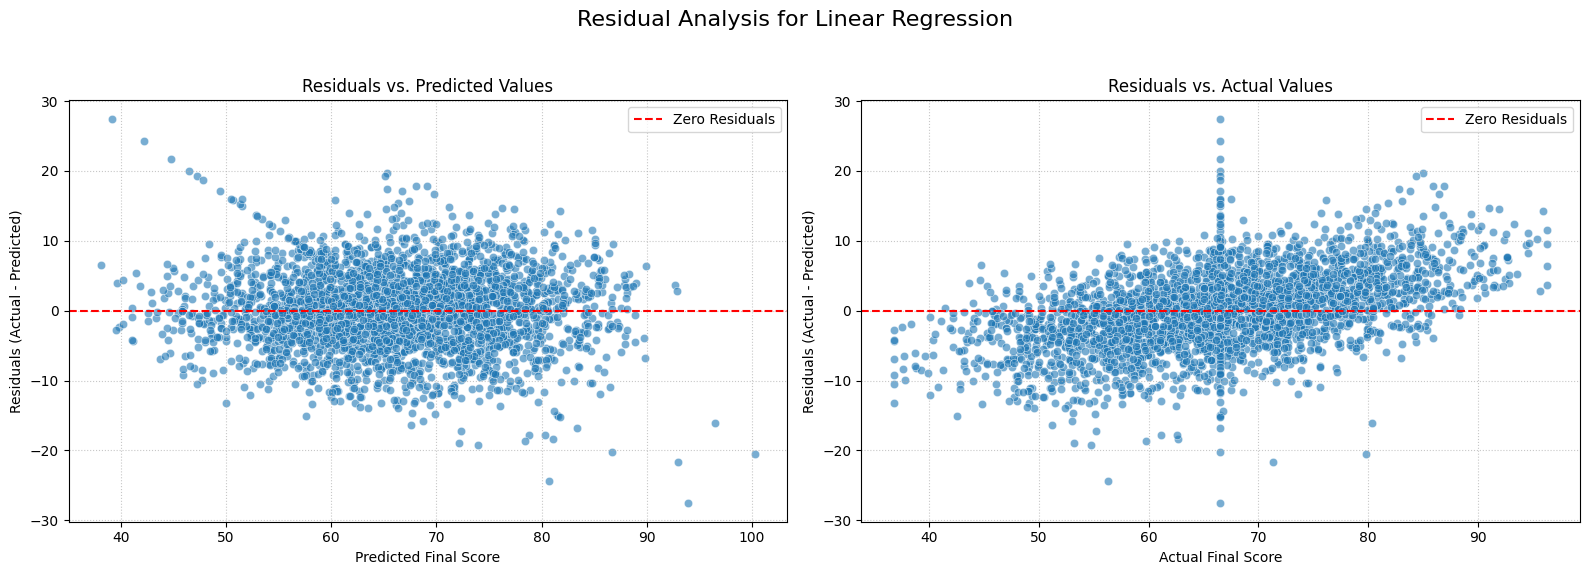

Top 10 Data Points with Largest Prediction Errors for Linear Regression:
       Actual   Predicted   Residual  Abs_Residual
7945     66.5   93.969322 -27.469322     27.469322
7916     66.5   39.142843  27.357157     27.357157
733      56.3   80.677318 -24.377318     24.377318
7578     66.5   42.158081  24.341919     24.341919
1383     66.5   44.739831  21.760169     21.760169
13751    71.3   93.006933 -21.706933     21.706933
15537    79.8  100.291165 -20.491165     20.491165
7294     66.5   86.680971 -20.180971     20.180971
8010     66.5   46.464443  20.035557     20.035557
16066    85.0   65.327639  19.672361     19.672361

--- Residual Analysis for Random Forest Regressor ---


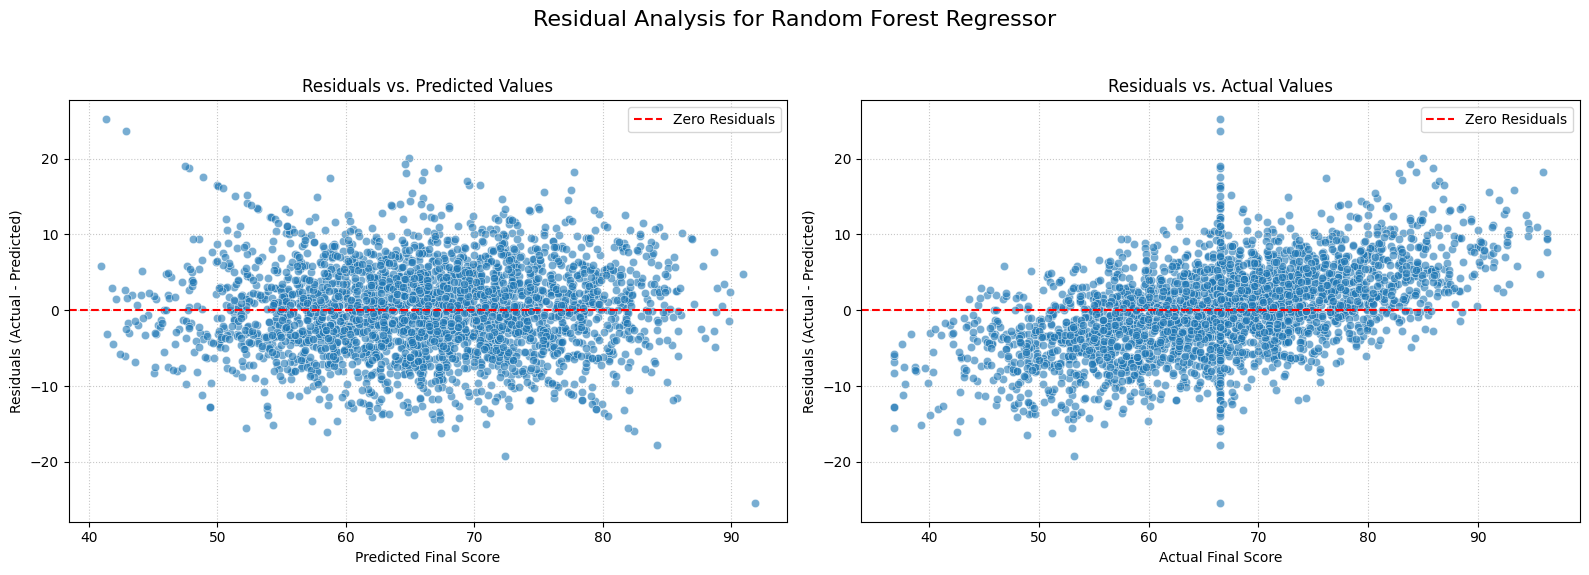

Top 10 Data Points with Largest Prediction Errors for Random Forest Regressor:
       Actual  Predicted  Residual  Abs_Residual
7945     66.5    91.8505  -25.3505       25.3505
7916     66.5    41.3440   25.1560       25.1560
7578     66.5    42.8660   23.6340       23.6340
16066    85.0    64.8940   20.1060       20.1060
8171     83.8    64.5760   19.2240       19.2240
16246    53.2    72.3660  -19.1660       19.1660
2662     66.5    47.4595   19.0405       19.0405
13863    85.9    67.1840   18.7160       18.7160
1383     66.5    47.7985   18.7015       18.7015
6880     84.4    66.1300   18.2700       18.2700

--- Residual Analysis for XGBoost Regressor ---


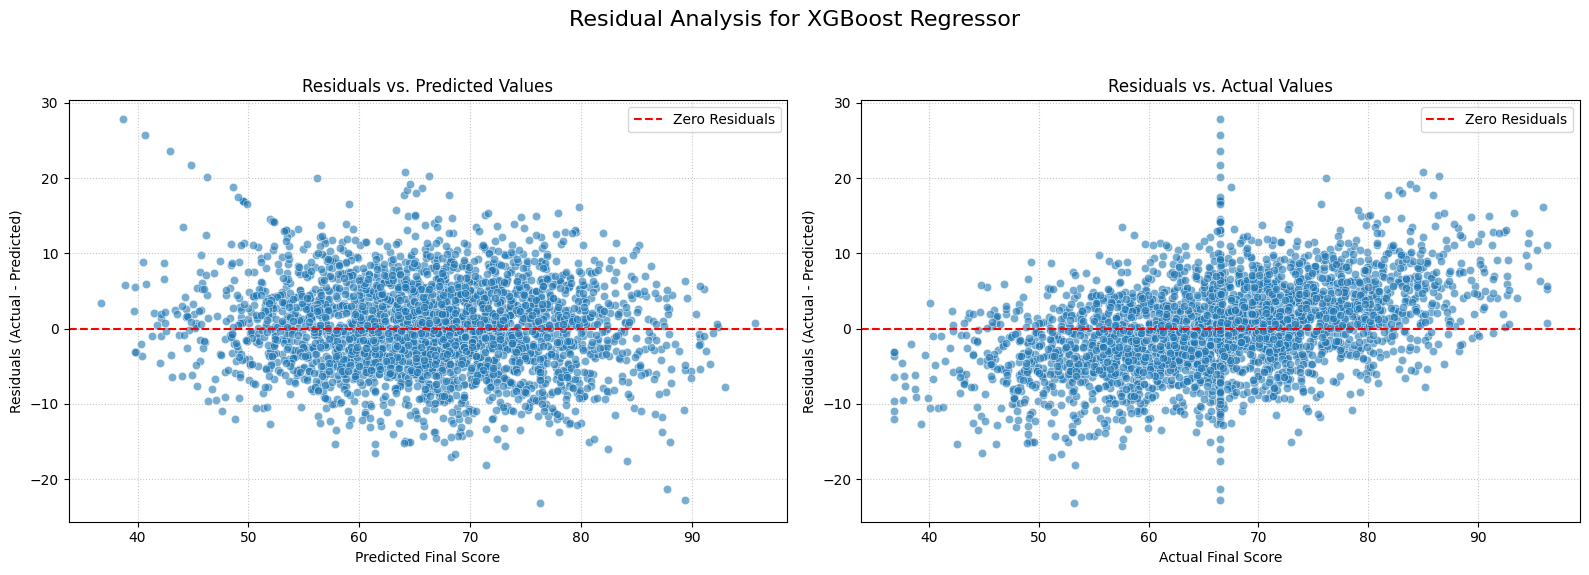

Top 10 Data Points with Largest Prediction Errors for XGBoost Regressor:
       Actual  Predicted   Residual  Abs_Residual
7578     66.5  38.710064  27.789936     27.789936
7916     66.5  40.704933  25.795067     25.795067
2662     66.5  42.934822  23.565178     23.565178
16246    53.2  76.306778 -23.106778     23.106778
7945     66.5  89.329514 -22.829514     22.829514
1383     66.5  44.799839  21.700161     21.700161
7294     66.5  87.743149 -21.243149     21.243149
16066    85.0  64.121170  20.878830     20.878830
18907    86.5  66.252365  20.247635     20.247635
8010     66.5  46.295376  20.204624     20.204624

--- Residual Analysis for k-Nearest Neighbors Regressor ---


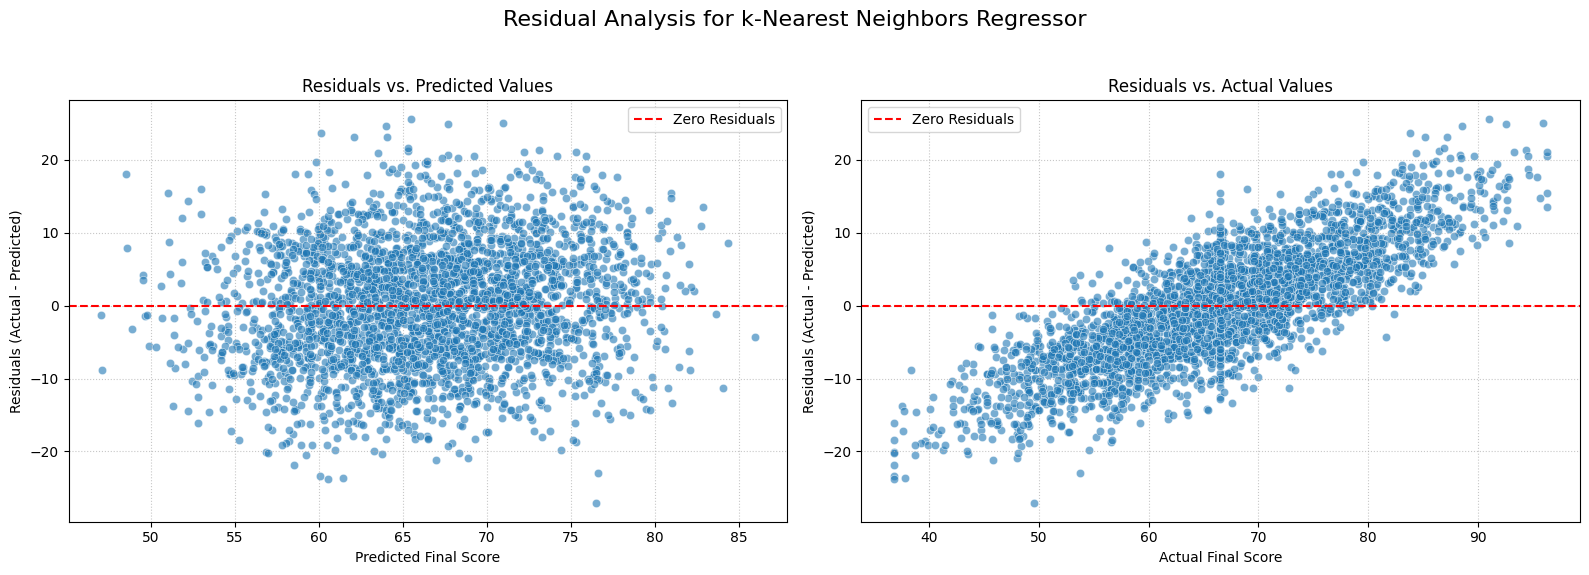

Top 10 Data Points with Largest Prediction Errors for k-Nearest Neighbors Regressor:
       Actual  Predicted  Residual  Abs_Residual
8170    49.50      76.50    -27.00         27.00
3684    91.00      65.50     25.50         25.50
8614    96.00      70.94     25.06         25.06
6672    92.60      67.70     24.90         24.90
16582   88.60      63.96     24.64         24.64
5940    36.75      60.52    -23.77         23.77
8171    83.80      60.10     23.70         23.70
11764   37.80      61.44    -23.64         23.64
9800    36.75      60.06    -23.31         23.31
14129   87.20      64.04     23.16         23.16

--- Residual Analysis for Support Vector Regressor ---


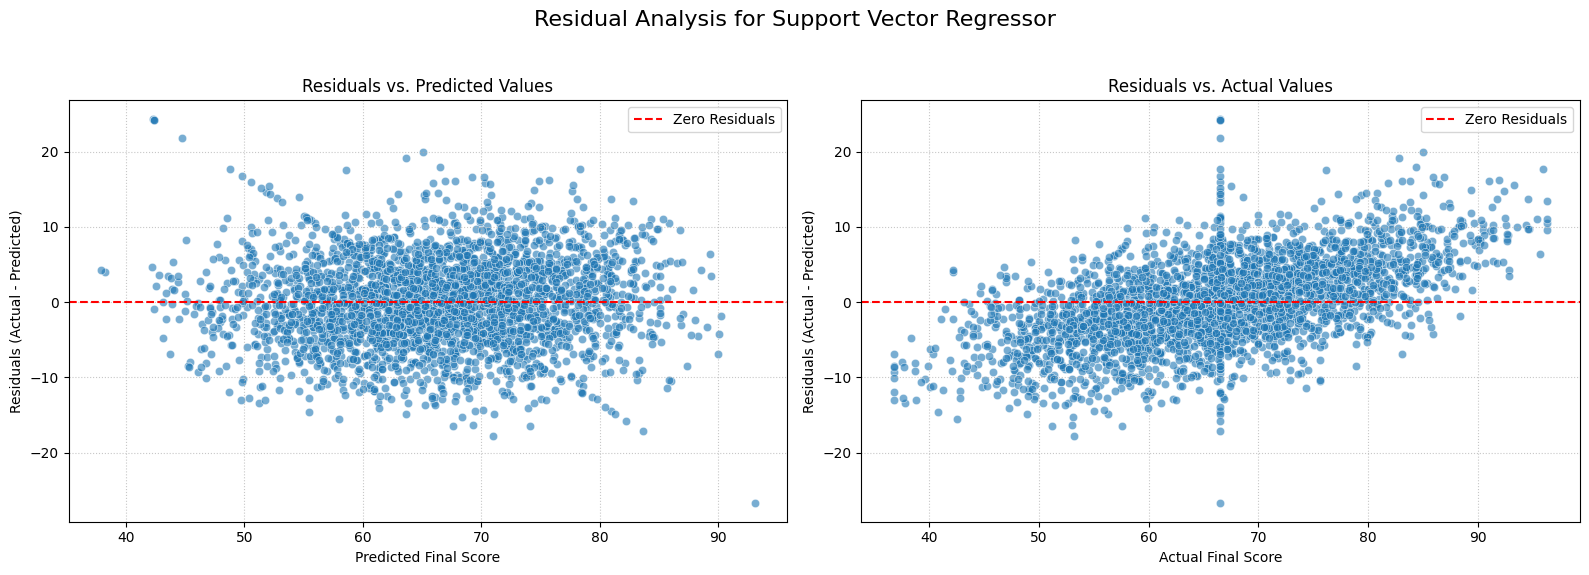

Top 10 Data Points with Largest Prediction Errors for Support Vector Regressor:
       Actual  Predicted   Residual  Abs_Residual
7945     66.5  93.115505 -26.615505     26.615505
7916     66.5  42.247450  24.252550     24.252550
1383     66.5  42.350587  24.149413     24.149413
8010     66.5  42.368189  24.131811     24.131811
7578     66.5  44.691543  21.808457     21.808457
16066    85.0  65.126069  19.873931     19.873931
10201    82.8  63.680906  19.119094     19.119094
6880     84.4  66.495633  17.904367     17.904367
16246    53.2  71.041672 -17.841672     17.841672
11982    66.5  48.764380  17.735620     17.735620

--- Residual Analysis for Gradient Boosting Regressor ---


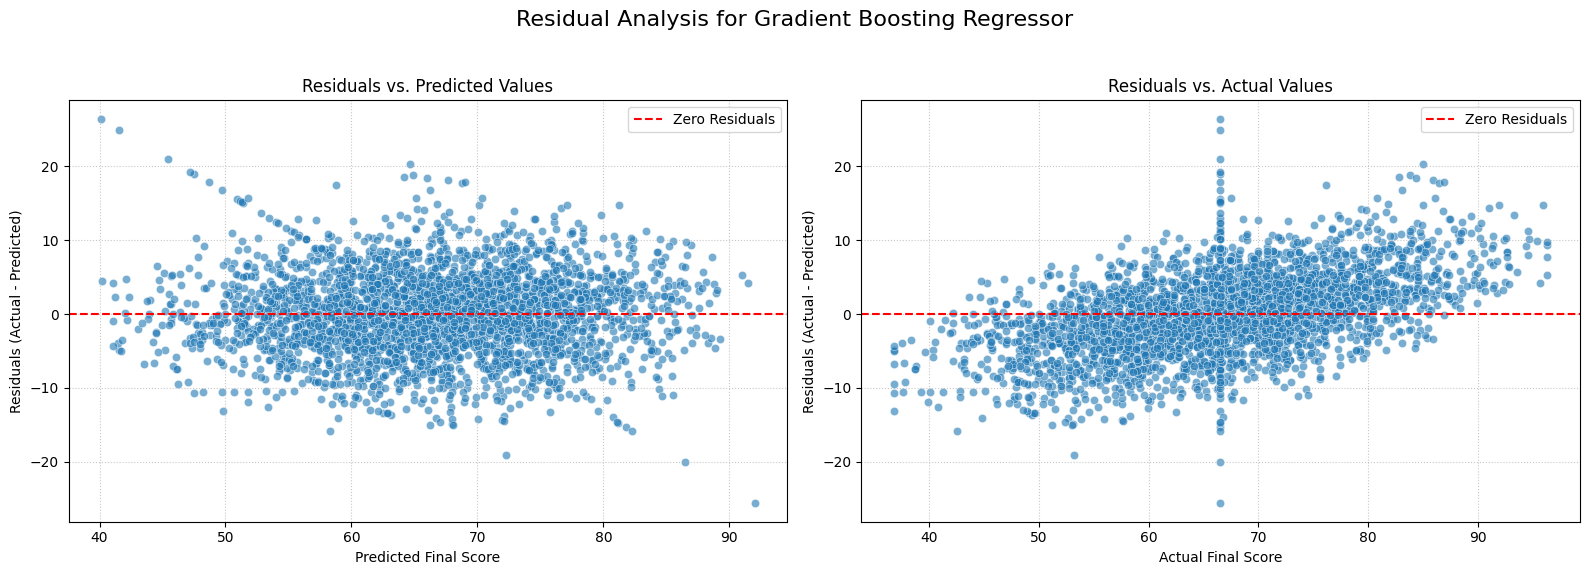

Top 10 Data Points with Largest Prediction Errors for Gradient Boosting Regressor:
       Actual  Predicted   Residual  Abs_Residual
7916     66.5  40.133876  26.366124     26.366124
7945     66.5  92.024549 -25.524549     25.524549
7578     66.5  41.547050  24.952950     24.952950
1383     66.5  45.437289  21.062711     21.062711
16066    85.0  64.642682  20.357318     20.357318
7294     66.5  86.464636 -19.964636     19.964636
2662     66.5  47.183071  19.316929     19.316929
16246    53.2  72.247134 -19.047134     19.047134
8010     66.5  47.476531  19.023469     19.023469
8171     83.8  64.895850  18.904150     18.904150


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Create a dictionary of the trained regression models along with their names
regression_models = {
    'Linear Regression': linear_reg_model,
    'Random Forest Regressor': random_forest_reg_model,
    'XGBoost Regressor': xgb_reg_model,
    'k-Nearest Neighbors Regressor': knn_reg_model,
    'Support Vector Regressor': svr_model,
    'Gradient Boosting Regressor': gradient_boosting_reg_model
}

for model_name, model in regression_models.items():
    print(f"\n--- Residual Analysis for {model_name} ---")

    # Make predictions on the validation set
    y_pred = model.predict(X_val)

    # Calculate the residuals
    residuals = y_val - y_pred

    # Create a figure with two subplots side-by-side
    plt.figure(figsize=(16, 6))
    plt.suptitle(f'Residual Analysis for {model_name}', fontsize=16)

    # Plot 1: Residuals vs. Predicted Values
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
    plt.title('Residuals vs. Predicted Values')
    plt.xlabel('Predicted Final Score')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)

    # Plot 2: Residuals vs. Actual Values
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=y_val, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals')
    plt.title('Residuals vs. Actual Values')
    plt.xlabel('Actual Final Score')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent suptitle overlap
    plt.show()

    # Create a DataFrame for validation results to easily sort by error
    validation_results = pd.DataFrame({
        'Actual': y_val,
        'Predicted': y_pred,
        'Residual': residuals,
        'Abs_Residual': np.abs(residuals)
    })

    # Sort by absolute residual to find the largest errors
    top_error_points = validation_results.sort_values(by='Abs_Residual', ascending=False).head(10)

    print(f"Top 10 Data Points with Largest Prediction Errors for {model_name}:")
    print(top_error_points.to_string())

In [ ]:
import pandas as pd
import numpy as np # Import numpy for np.abs

# Calculate residuals for Linear Regression directly
residuals_lr = y_val - y_pred_lr

# Create a DataFrame for validation results to easily sort by error
validation_results = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_pred_lr,
    'Residual': residuals_lr,
    'Abs_Residual': np.abs(residuals_lr)
})

# Sort by absolute residual to find the largest errors
top_error_points = validation_results.sort_values(by='Abs_Residual', ascending=False).head(10)

print("\nTop 10 Data Points with Largest Prediction Errors:")
print(top_error_points.to_string())


Top 10 Data Points with Largest Prediction Errors:
       Actual   Predicted   Residual  Abs_Residual
7945     66.5   93.969322 -27.469322     27.469322
7916     66.5   39.142843  27.357157     27.357157
733      56.3   80.677318 -24.377318     24.377318
7578     66.5   42.158081  24.341919     24.341919
1383     66.5   44.739831  21.760169     21.760169
13751    71.3   93.006933 -21.706933     21.706933
15537    79.8  100.291165 -20.491165     20.491165
7294     66.5   86.680971 -20.180971     20.180971
8010     66.5   46.464443  20.035557     20.035557
16066    85.0   65.327639  19.672361     19.672361


In [ ]:
import pandas as pd
import numpy as np

# Get the feature names from X_train
feature_names = X_train.columns

# Get the coefficients from the trained Linear Regression model
coefficients = linear_reg_model.coef_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to see the most influential features
feature_importance_df['Abs_Coefficient'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Linear Regression Model Coefficients (Feature Importance):")
print(feature_importance_df.to_string(index=False))

Linear Regression Model Coefficients (Feature Importance):
                    Feature  Coefficient  Abs_Coefficient
              midterm_score     6.960876         6.960876
             quiz_avg_score     4.171838         4.171838
 assignment_submission_rate     3.491809         3.491809
    lecture_attendance_rate     3.268159         3.268159
               stress_level    -0.137704         0.137704
                gender_Male     0.136481         0.136481
      course_type_Mandatory     0.118168         0.118168
     group_project_activity    -0.090396         0.090396
     prior_semester_credits     0.084049         0.084049
   teacher_experience_years    -0.084018         0.084018
       past_attendance_rate    -0.082467         0.082467
   course_difficulty_rating     0.080092         0.080092
          part_time_job_Yes    -0.079551         0.079551
  study_hours_last_semester    -0.076489         0.076489
      math_background_score     0.063746         0.063746
             

# Prepare Data for Final Grade (Classification)

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define features (X_grade) and target (y_grade) for 'final_grade_encoded' classification
X_grade = df_encoded.drop(columns=['final_score', 'final_grade_encoded', 'pass_fail_encoded'])
y_grade = df_encoded['final_grade_encoded']

print(f"Shape of features (X_grade): {X_grade.shape}")
print(f"Shape of target (y_grade): {y_grade.shape}")

# 3. First split: 70% train, 30% temp (validation + test)
X_train_grade, X_temp_grade, y_train_grade, y_temp_grade = train_test_split(X_grade, y_grade, test_size=0.30, random_state=42, stratify=y_grade)

# 4. Second split: 15% validation, 15% test from the 30% temp data
X_val_grade, X_test_grade, y_val_grade, y_test_grade = train_test_split(X_temp_grade, y_temp_grade, test_size=0.50, random_state=42, stratify=y_temp_grade)

# 5. Print the shapes of the resulting datasets
print(f"\nTraining set shape: X={X_train_grade.shape}, y={y_train_grade.shape}")
print(f"Validation set shape: X={X_val_grade.shape}, y={y_val_grade.shape}")
print(f"Test set shape: X={X_test_grade.shape}, y={y_test_grade.shape}")

Shape of features (X_grade): (20000, 38)
Shape of target (y_grade): (20000,)

Training set shape: X=(14000, 38), y=(14000,)
Validation set shape: X=(3000, 38), y=(3000,)
Test set shape: X=(3000, 38), y=(3000,)


# Train Classification Models for Final Grade

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 1. Train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000) # Removed multi_class as it's redundant with solver='lbfgs'
log_reg_model.fit(X_train_grade, y_train_grade)
print("Logistic Regression model trained successfully.")

# 2. Train Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_grade, y_train_grade)
print("Decision Tree Classifier model trained successfully.")

# 3. Train Random Forest Classifier model
random_forest_clf_model = RandomForestClassifier(random_state=42)
random_forest_clf_model.fit(X_train_grade, y_train_grade)
print("Random Forest Classifier model trained successfully.")

# 4. Train XGBoost Classifier model
xgb_clf_model = XGBClassifier(random_state=42, eval_metric='mlogloss') # Removed deprecated use_label_encoder parameter
xgb_clf_model.fit(X_train_grade, y_train_grade)
print("XGBoost Classifier model trained successfully.")

# 5. Support Vector Classifier model
svc_grade_model = SVC(random_state=42, kernel='linear')
svc_grade_model.fit(X_train_grade, y_train_grade)
print("Support Vector Classifier model trained successfully for Final Grade.")

# 6. k-Nearest Neighbors Classifier model
knn_grade_model = KNeighborsClassifier(n_neighbors=5)
knn_grade_model.fit(X_train_grade, y_train_grade)
print("k-Nearest Neighbors Classifier model trained successfully for Final Grade.")

Logistic Regression model trained successfully.
Decision Tree Classifier model trained successfully.
Random Forest Classifier model trained successfully.
XGBoost Classifier model trained successfully.
Support Vector Classifier model trained successfully for Final Grade.
k-Nearest Neighbors Classifier model trained successfully for Final Grade.


# Evaluate Classification Models for Final Grade

--- Classification Model Performance on Validation Set ---

Logistic Regression:
  Accuracy: 0.6930
  Precision: 0.5615
  Recall: 0.6930
  F1-Score: 0.5973


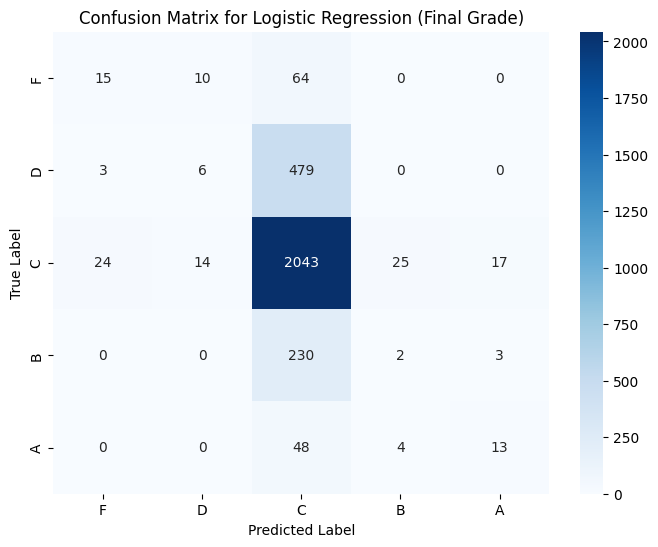

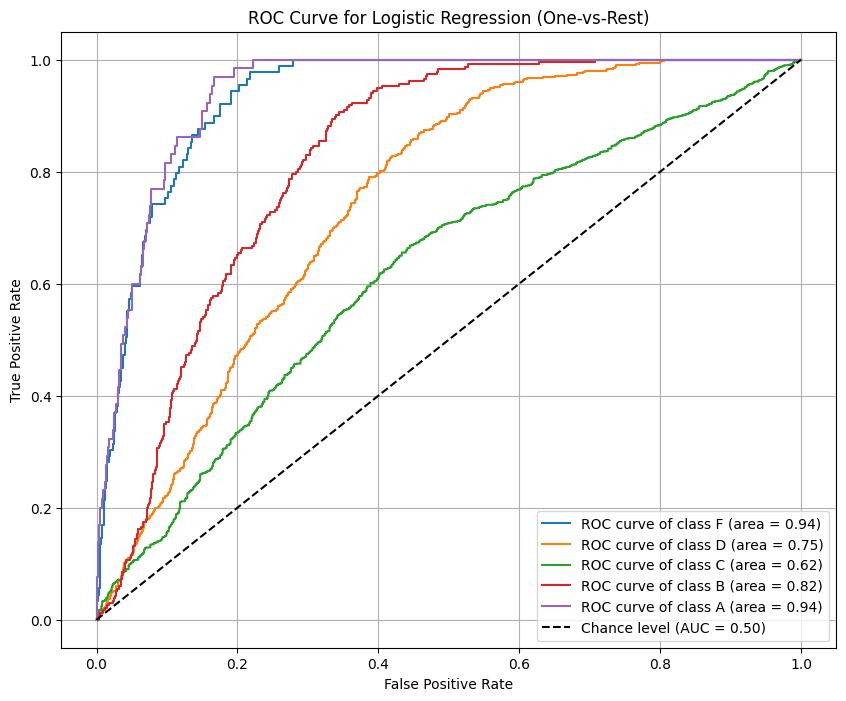

  Average AUC (One-vs-Rest): 0.8148

Decision Tree Classifier:
  Accuracy: 0.5653
  Precision: 0.5755
  Recall: 0.5653
  F1-Score: 0.5702


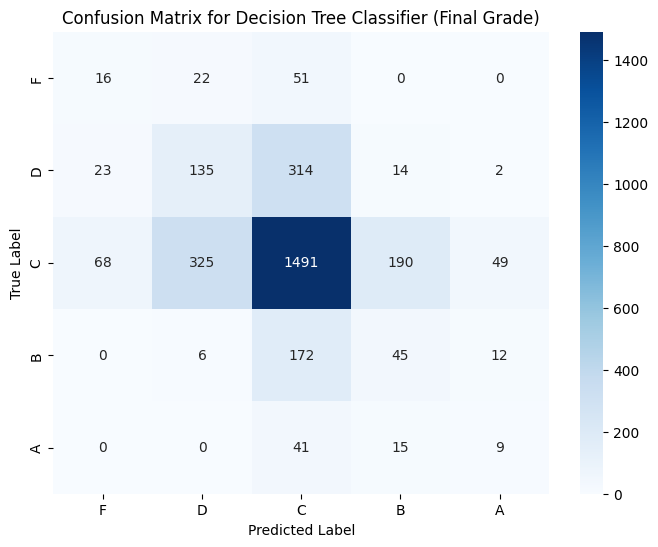

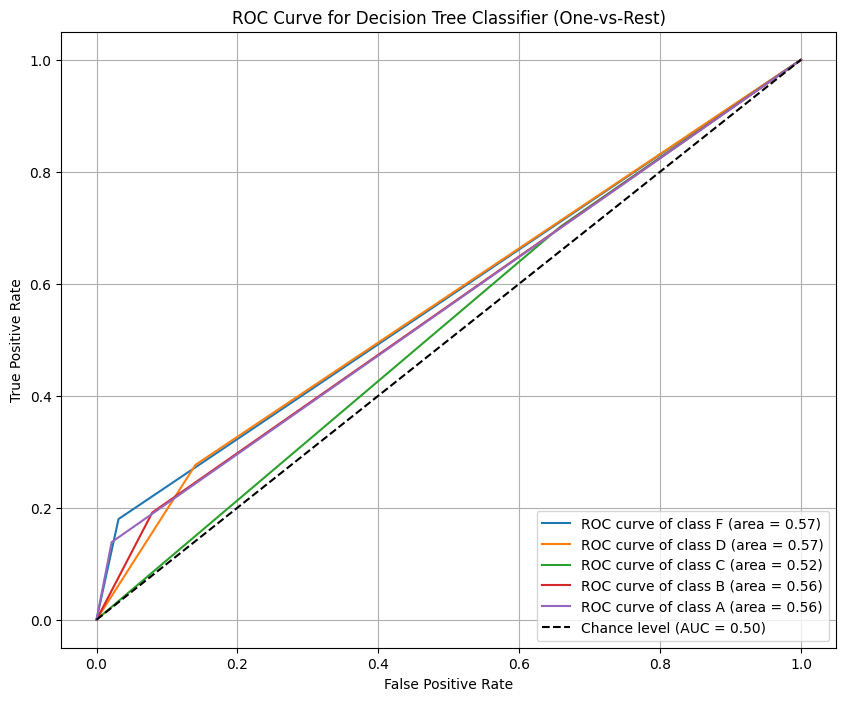

  Average AUC (One-vs-Rest): 0.5557

Random Forest Classifier:
  Accuracy: 0.7077
  Precision: 0.5008
  Recall: 0.7077
  F1-Score: 0.5865


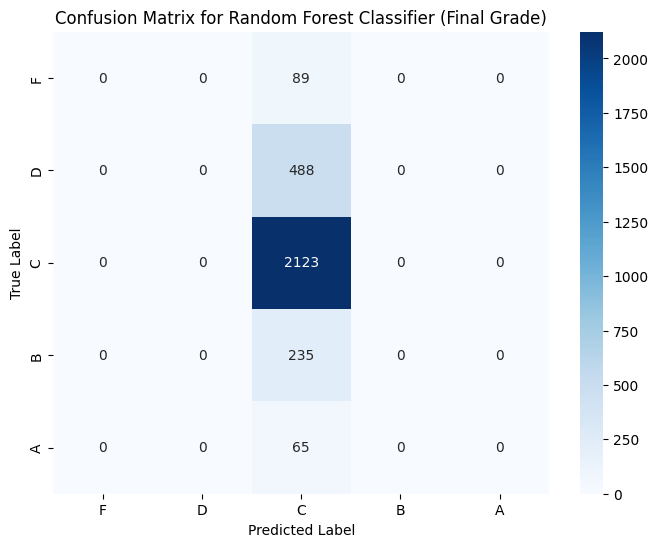

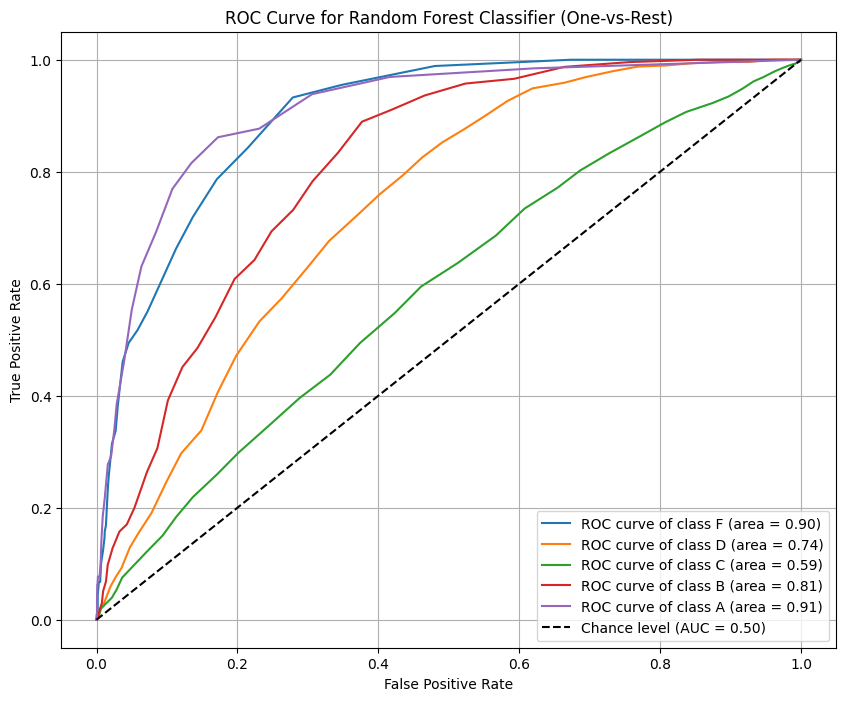

  Average AUC (One-vs-Rest): 0.7886

XGBoost Classifier:
  Accuracy: 0.6953
  Precision: 0.6000
  Recall: 0.6953
  F1-Score: 0.6054


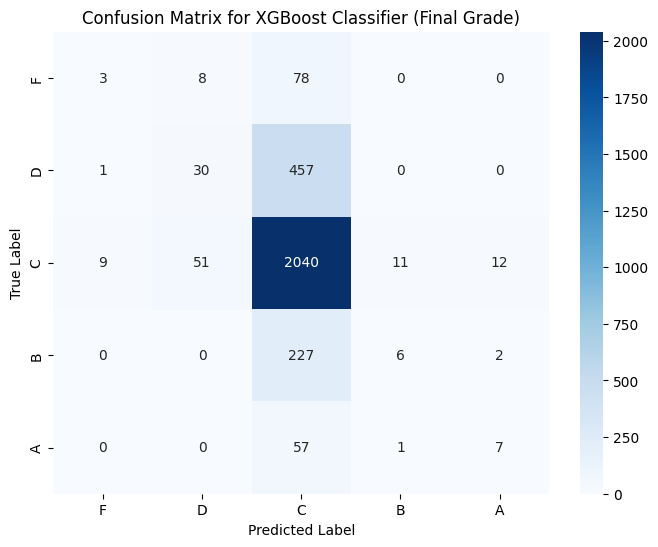

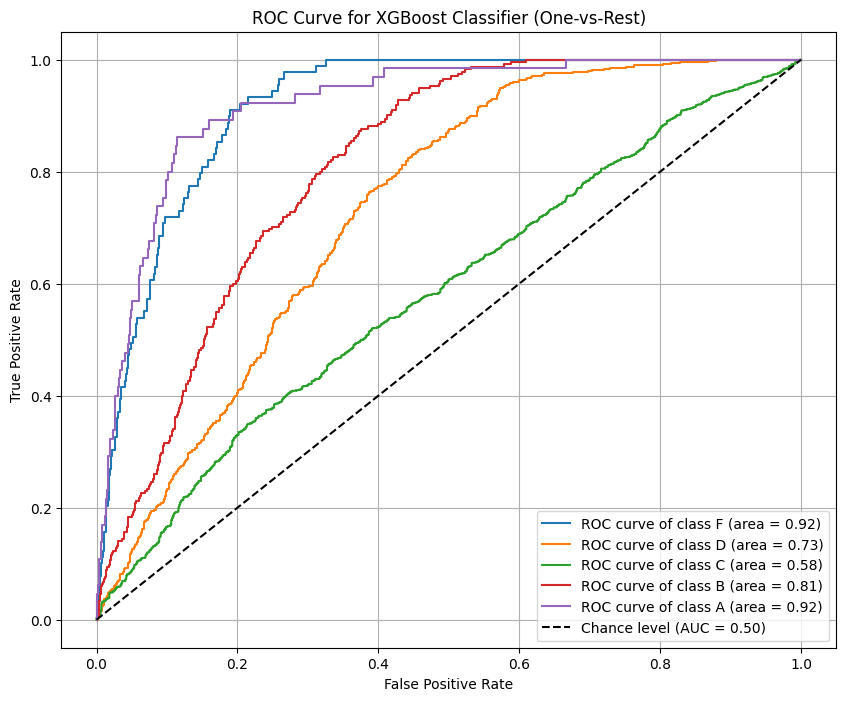

  Average AUC (One-vs-Rest): 0.7937

Support Vector Classifier:
  Accuracy: 0.7077
  Precision: 0.5008
  Recall: 0.7077
  F1-Score: 0.5865


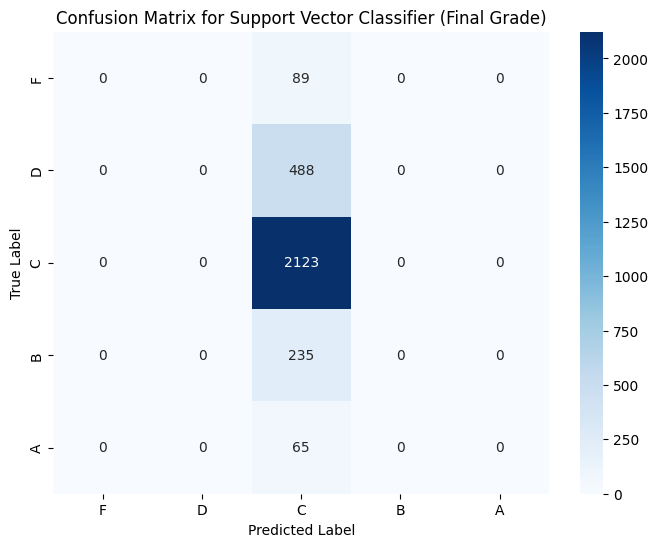

  ROC Curve and AUC not available (model does not support predict_proba).

k-Nearest Neighbors Classifier:
  Accuracy: 0.6557
  Precision: 0.5632
  Recall: 0.6557
  F1-Score: 0.5938


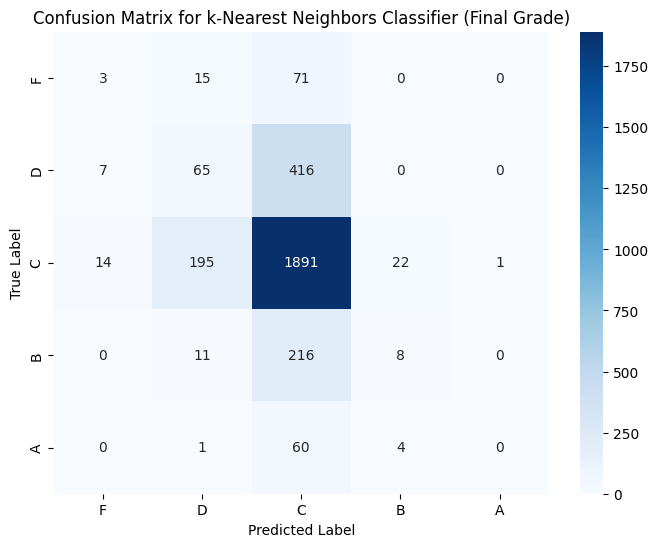

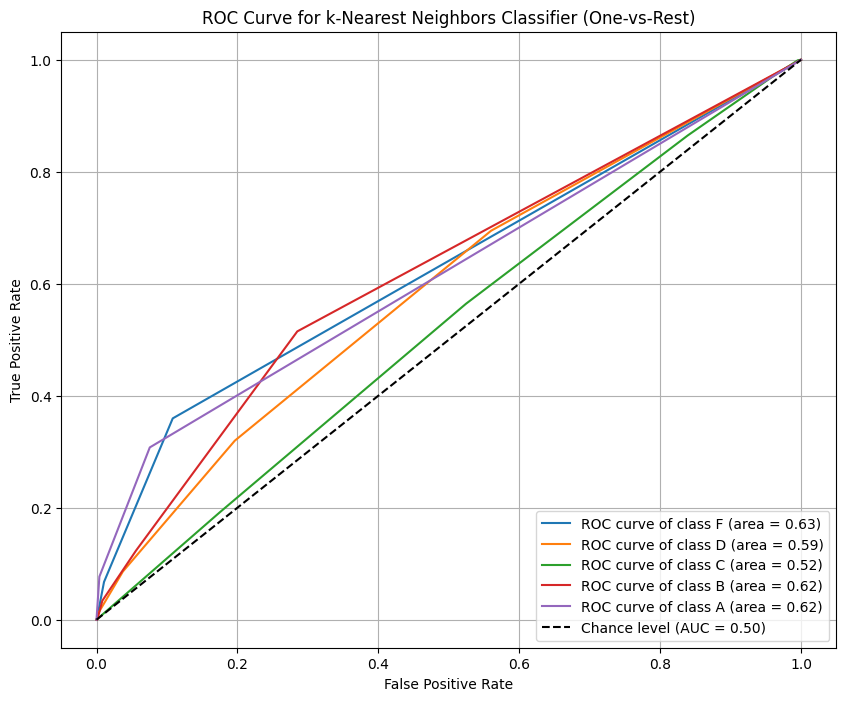

  Average AUC (One-vs-Rest): 0.5959


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store predictions and model names for easier iteration
models = {
    "Logistic Regression": log_reg_model,
    "Decision Tree Classifier": decision_tree_model,
    "Random Forest Classifier": random_forest_clf_model,
    "XGBoost Classifier": xgb_clf_model,
    "Support Vector Classifier": svc_grade_model,
    "k-Nearest Neighbors Classifier": knn_grade_model
}

# Define target names based on the grade order ['F', 'D', 'C', 'B', 'A']
grade_target_names = ['F', 'D', 'C', 'B', 'A']

print("--- Classification Model Performance on Validation Set ---")

for model_name, model in models.items():
    # Make predictions on the validation set
    y_pred = model.predict(X_val_grade)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val_grade, y_pred)
    precision = precision_score(y_val_grade, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_val_grade, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_val_grade, y_pred, average='weighted', zero_division=0)

    # Print the evaluation metrics
    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_val_grade, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=grade_target_names, yticklabels=grade_target_names)
    plt.title(f'Confusion Matrix for {model_name} (Final Grade)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Calculate and plot ROC curve and AUC for multi-class (One-vs-Rest)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val_grade)

        lb = LabelBinarizer()
        y_val_binarized = lb.fit_transform(y_val_grade)

        plt.figure(figsize=(10, 8))
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(lb.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {grade_target_names[i]} (area = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.50)')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name} (One-vs-Rest)')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

        avg_roc_auc = sum(roc_auc.values()) / len(roc_auc)
        print(f"  Average AUC (One-vs-Rest): {avg_roc_auc:.4f}")
    else:
        print("  ROC Curve and AUC not available (model does not support predict_proba).")

# Summarize Final Grade Model Performance

In [ ]:
import pandas as pd

# Create a dictionary to store model performance metrics
performance_summary_clf = {
    'Model': [
        'Logistic Regression',
        'Decision Tree Classifier',
        'Random Forest Classifier',
        'XGBoost Classifier',
        'Support Vector Classifier',
        'k-Nearest Neighbors Classifier'
    ],
    'Accuracy': [
        accuracy_score(y_val_grade, log_reg_model.predict(X_val_grade)),
        accuracy_score(y_val_grade, decision_tree_model.predict(X_val_grade)),
        accuracy_score(y_val_grade, random_forest_clf_model.predict(X_val_grade)),
        accuracy_score(y_val_grade, xgb_clf_model.predict(X_val_grade)),
        accuracy_score(y_val_grade, svc_grade_model.predict(X_val_grade)),
        accuracy_score(y_val_grade, knn_grade_model.predict(X_val_grade))
    ],
    'Precision': [
        precision_score(y_val_grade, log_reg_model.predict(X_val_grade), average='weighted', zero_division=0),
        precision_score(y_val_grade, decision_tree_model.predict(X_val_grade), average='weighted', zero_division=0),
        precision_score(y_val_grade, random_forest_clf_model.predict(X_val_grade), average='weighted', zero_division=0),
        precision_score(y_val_grade, xgb_clf_model.predict(X_val_grade), average='weighted', zero_division=0),
        precision_score(y_val_grade, svc_grade_model.predict(X_val_grade), average='weighted', zero_division=0),
        precision_score(y_val_grade, knn_grade_model.predict(X_val_grade), average='weighted', zero_division=0)
    ],
    'Recall': [
        recall_score(y_val_grade, log_reg_model.predict(X_val_grade), average='weighted', zero_division=0),
        recall_score(y_val_grade, decision_tree_model.predict(X_val_grade), average='weighted', zero_division=0),
        recall_score(y_val_grade, random_forest_clf_model.predict(X_val_grade), average='weighted', zero_division=0),
        recall_score(y_val_grade, xgb_clf_model.predict(X_val_grade), average='weighted', zero_division=0),
        recall_score(y_val_grade, svc_grade_model.predict(X_val_grade), average='weighted', zero_division=0),
        recall_score(y_val_grade, knn_grade_model.predict(X_val_grade), average='weighted', zero_division=0)
    ],
    'F1-Score': [
        f1_score(y_val_grade, log_reg_model.predict(X_val_grade), average='weighted', zero_division=0),
        f1_score(y_val_grade, decision_tree_model.predict(X_val_grade), average='weighted', zero_division=0),
        f1_score(y_val_grade, random_forest_clf_model.predict(X_val_grade), average='weighted', zero_division=0),
        f1_score(y_val_grade, xgb_clf_model.predict(X_val_grade), average='weighted', zero_division=0),
        f1_score(y_val_grade, svc_grade_model.predict(X_val_grade), average='weighted', zero_division=0),
        f1_score(y_val_grade, knn_grade_model.predict(X_val_grade), average='weighted', zero_division=0)
    ]
}

# Create a DataFrame from the summary dictionary
performance_df_clf = pd.DataFrame(performance_summary_clf)

# Sort by F1-Score (descending) to find the best model
performance_df_clf_sorted = performance_df_clf.sort_values(by='F1-Score', ascending=False)

print("\n--- Classification Model Performance Summary on Validation Set (Final Grade) ---")
print(performance_df_clf_sorted.to_string(index=False))

# Identify the best performing model
best_model_row_clf = performance_df_clf_sorted.iloc[0]
print(f"\nBest Performing Model: {best_model_row_clf['Model']} with F1-Score of {best_model_row_clf['F1-Score']:.4f}, Accuracy of {best_model_row_clf['Accuracy']:.4f}, Precision of {best_model_row_clf['Precision']:.4f}, and Recall of {best_model_row_clf['Recall']:.4f}")


--- Classification Model Performance Summary on Validation Set (Final Grade) ---
                         Model  Accuracy  Precision   Recall  F1-Score
            XGBoost Classifier  0.695333   0.599957 0.695333  0.605445
           Logistic Regression  0.693000   0.561523 0.693000  0.597301
k-Nearest Neighbors Classifier  0.655667   0.563200 0.655667  0.593787
      Random Forest Classifier  0.707667   0.500792 0.707667  0.586522
     Support Vector Classifier  0.707667   0.500792 0.707667  0.586522
      Decision Tree Classifier  0.565333   0.575468 0.565333  0.570221

Best Performing Model: XGBoost Classifier with F1-Score of 0.6054, Accuracy of 0.6953, Precision of 0.6000, and Recall of 0.6953


# Hyperparameter Tuning for Final Grade's Best Model

In [ ]:
# DON'T RUN THIS!!!!!!!!!
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost Classifier
param_grid = {
    'n_estimators': [100, 200, 300], # Number of boosting rounds
    'max_depth': [3, 5, 7],         # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage to prevent overfitting
    'subsample': [0.7, 0.9],        # Subsample ratio of the training instance
    'colsample_bytree': [0.7, 0.9]  # Subsample ratio of columns when constructing each tree
}

# Instantiate XGBClassifier with fixed parameters
xgb_base_model = XGBClassifier(random_state=42, eval_metric='mlogloss') # Removed deprecated use_label_encoder parameter

# Instantiate GridSearchCV
# Using cv=3 for quicker execution, in practice, a higher cv (e.g., 5 or 10) might be preferred.
grid_search = GridSearchCV(
    estimator=xgb_base_model,
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1 # Use all available cores
)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for XGBoost Classifier...")
grid_search.fit(X_train_grade, y_train_grade)

print("GridSearchCV completed.")

# Print the best parameters and best score
print("\nBest parameters found:", grid_search.best_params_)
print("Best F1-weighted score found:", grid_search.best_score_)

Starting GridSearchCV for XGBoost Classifier...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
GridSearchCV completed.

Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best F1-weighted score found: 0.6062740472008746


# Error Analysis for Final Grade's Best Model

Best XGBoost Classifier model retrieved from GridSearchCV.


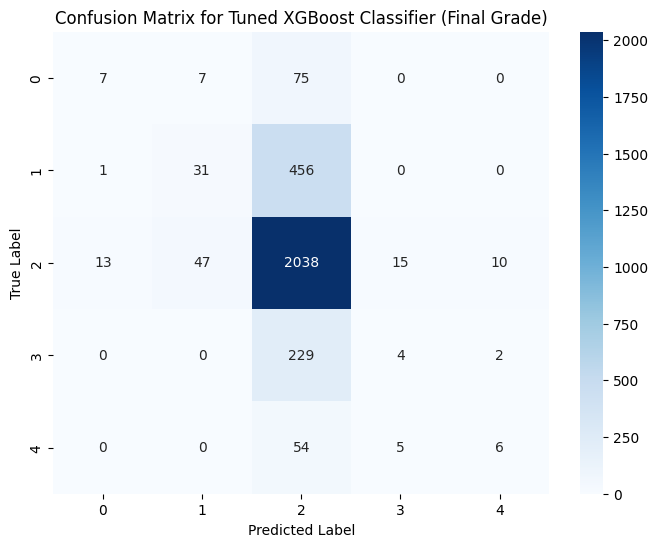


Classification Report for Tuned XGBoost Classifier (Final Grade):
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        89
           1       0.36      0.06      0.11       488
           2       0.71      0.96      0.82      2123
           3       0.17      0.02      0.03       235
           4       0.33      0.09      0.14        65

    accuracy                           0.70      3000
   macro avg       0.38      0.24      0.25      3000
weighted avg       0.60      0.70      0.61      3000



In [ ]:
# DEPENDS ON PREVIOUS!!!!!!!!!!!!
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Retrieve the best estimator from the grid_search object
best_xgb_model_grade = grid_search.best_estimator_
print("Best XGBoost Classifier model retrieved from GridSearchCV.")

# 2. Make predictions on the validation set
y_pred_best_xgb_grade = best_xgb_model_grade.predict(X_val_grade)

# 4. Generate and print the confusion matrix
cm = confusion_matrix(y_val_grade, y_pred_best_xgb_grade)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned XGBoost Classifier (Final Grade)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5. Generate and print the classification report
print("\nClassification Report for Tuned XGBoost Classifier (Final Grade):")
print(classification_report(y_val_grade, y_pred_best_xgb_grade, zero_division=0))

# Prepare Data for Pass/Fail (Binary Classification)

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define features (X_pass_fail) and target (y_pass_fail) for 'pass_fail_encoded' binary classification
X_pass_fail = df_encoded.drop(columns=['final_score', 'final_grade_encoded', 'pass_fail_encoded'])
y_pass_fail = df_encoded['pass_fail_encoded']

print(f"Shape of features (X_pass_fail): {X_pass_fail.shape}")
print(f"Shape of target (y_pass_fail): {y_pass_fail.shape}")

# 3. First split: 70% train, 30% temp (validation + test)
X_train_pass_fail, X_temp_pass_fail, y_train_pass_fail, y_temp_pass_fail = train_test_split(
    X_pass_fail, y_pass_fail, test_size=0.30, random_state=42, stratify=y_pass_fail
)

# 4. Second split: 15% validation, 15% test from the 30% temp data
X_val_pass_fail, X_test_pass_fail, y_val_pass_fail, y_test_pass_fail = train_test_split(
    X_temp_pass_fail, y_temp_pass_fail, test_size=0.50, random_state=42, stratify=y_temp_pass_fail
)

# 6. Print the shapes of the resulting datasets
print(f"\nTraining set shape: X={X_train_pass_fail.shape}, y={y_train_pass_fail.shape}")
print(f"Validation set shape: X={X_val_pass_fail.shape}, y={y_val_pass_fail.shape}")
print(f"Test set shape: X={X_test_pass_fail.shape}, y={y_test_pass_fail.shape}")

Shape of features (X_pass_fail): (20000, 38)
Shape of target (y_pass_fail): (20000,)

Training set shape: X=(14000, 38), y=(14000,)
Validation set shape: X=(3000, 38), y=(3000,)
Test set shape: X=(3000, 38), y=(3000,)


# Train Binary Classification Models for Pass/Fail

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 1. Train Logistic Regression model
log_reg_pass_fail_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
log_reg_pass_fail_model.fit(X_train_pass_fail, y_train_pass_fail)
print("Logistic Regression model trained successfully for Pass/Fail.")

# 2. Train Decision Tree Classifier model
decision_tree_pass_fail_model = DecisionTreeClassifier(random_state=42)
decision_tree_pass_fail_model.fit(X_train_pass_fail, y_train_pass_fail)
print("Decision Tree Classifier model trained successfully for Pass/Fail.")

# 3. Train Random Forest Classifier model
random_forest_pass_fail_model = RandomForestClassifier(random_state=42)
random_forest_pass_fail_model.fit(X_train_pass_fail, y_train_pass_fail)
print("Random Forest Classifier model trained successfully for Pass/Fail.")

# 4. Train XGBoost Classifier model
xgb_pass_fail_model = XGBClassifier(random_state=42, eval_metric='logloss') # eval_metric is set to 'logloss' for binary classification
xgb_pass_fail_model.fit(X_train_pass_fail, y_train_pass_fail)
print("XGBoost Classifier model trained successfully for Pass/Fail.")

# 5. Support Vector Classifier model
svc_pass_fail_model = SVC(random_state=42, kernel='linear', probability=True) # probability=True is needed for AUC-ROC calculation
svc_pass_fail_model.fit(X_train_pass_fail, y_train_pass_fail)
print("Support Vector Classifier model trained successfully for Pass/Fail.")

# 6. k-Nearest Neighbors Classifier model
knn_pass_fail_model = KNeighborsClassifier(n_neighbors=5)
knn_pass_fail_model.fit(X_train_pass_fail, y_train_pass_fail)
print("k-Nearest Neighbors Classifier model trained successfully for Pass/Fail.")

Logistic Regression model trained successfully for Pass/Fail.
Decision Tree Classifier model trained successfully for Pass/Fail.
Random Forest Classifier model trained successfully for Pass/Fail.
XGBoost Classifier model trained successfully for Pass/Fail.
Support Vector Classifier model trained successfully for Pass/Fail.
k-Nearest Neighbors Classifier model trained successfully for Pass/Fail.


# Evaluate Binary Classification Models for Pass/Fail

--- Binary Classification Model Performance on Validation Set (Pass/Fail) ---

Logistic Regression:
  Accuracy: 0.9510
  Precision: 0.9620
  Recall: 0.9864
  F1-Score: 0.9741
  AUC-ROC: 0.9553


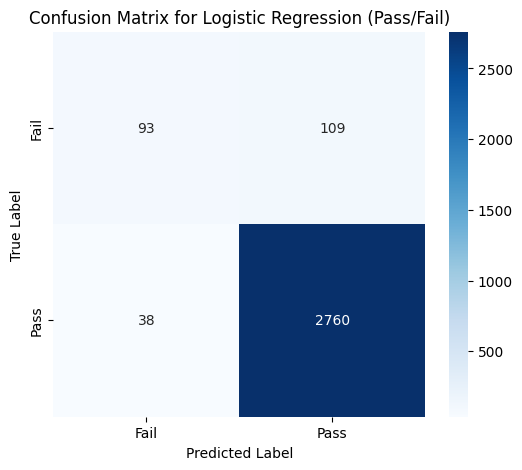

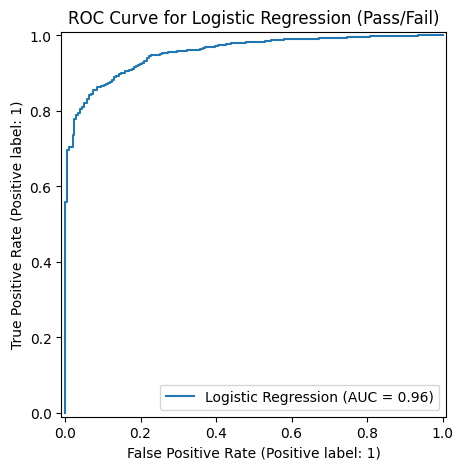


Decision Tree Classifier:
  Accuracy: 0.9123
  Precision: 0.9584
  Recall: 0.9471
  F1-Score: 0.9527
  AUC-ROC: 0.6889


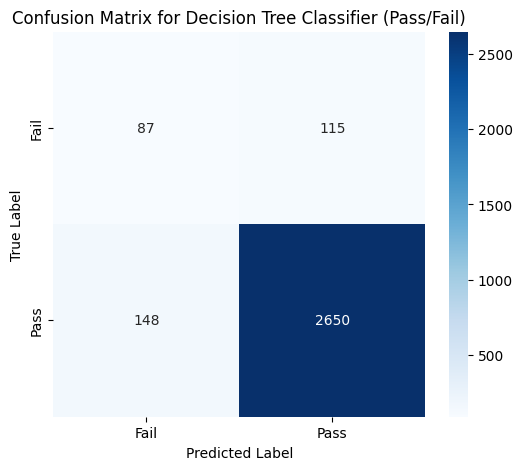

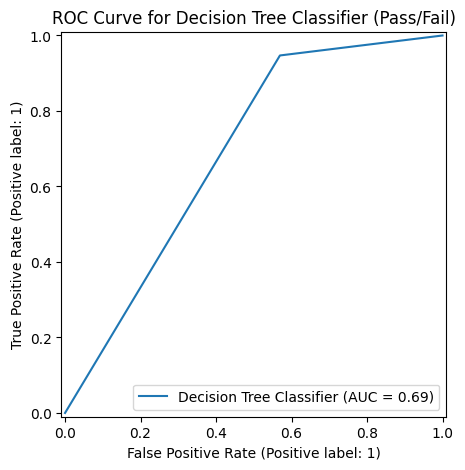


Random Forest Classifier:
  Accuracy: 0.9420
  Precision: 0.9426
  Recall: 0.9986
  F1-Score: 0.9698
  AUC-ROC: 0.9299


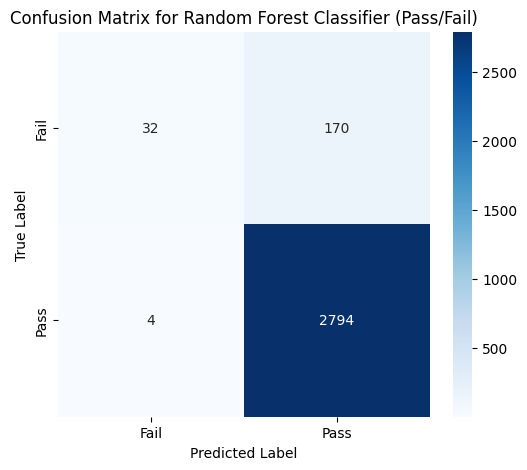

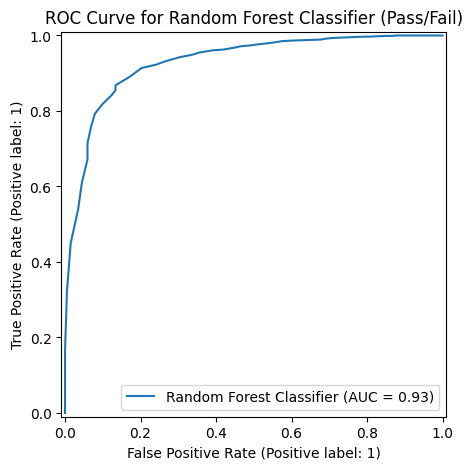


XGBoost Classifier:
  Accuracy: 0.9453
  Precision: 0.9570
  Recall: 0.9857
  F1-Score: 0.9711
  AUC-ROC: 0.9396


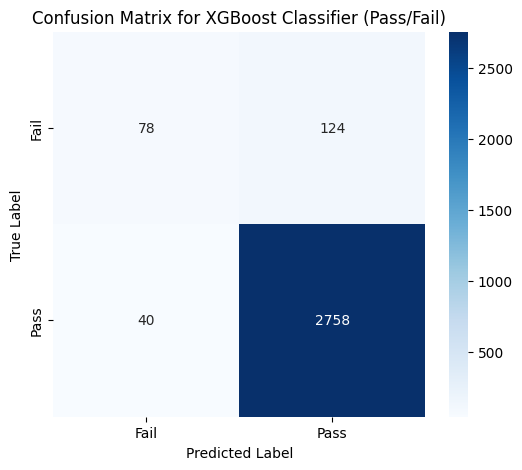

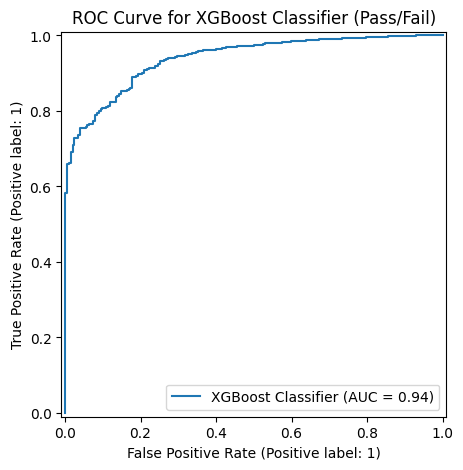


Support Vector Classifier:
  Accuracy: 0.9480
  Precision: 0.9549
  Recall: 0.9911
  F1-Score: 0.9726
  AUC-ROC: 0.9544


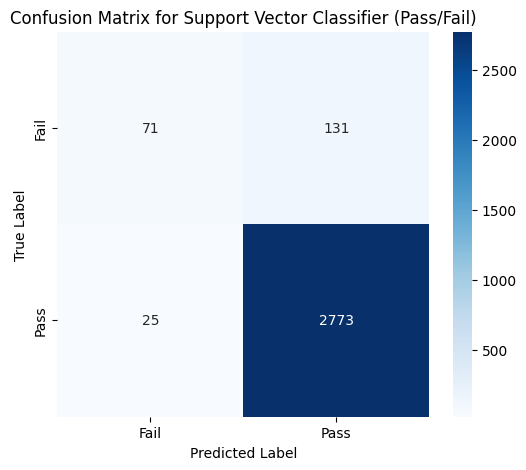

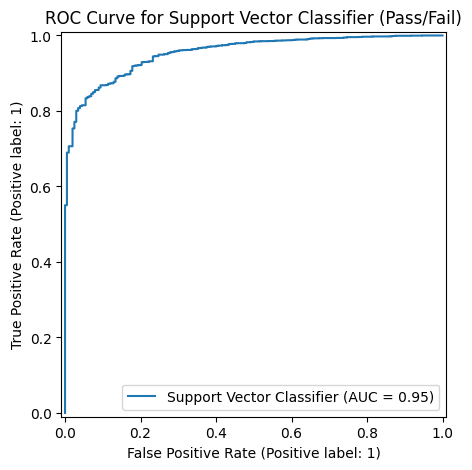


k-Nearest Neighbors Classifier:
  Accuracy: 0.9350
  Precision: 0.9378
  Recall: 0.9964
  F1-Score: 0.9662
  AUC-ROC: 0.7115


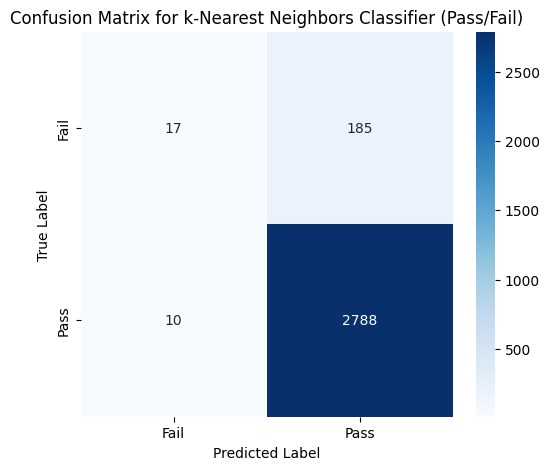

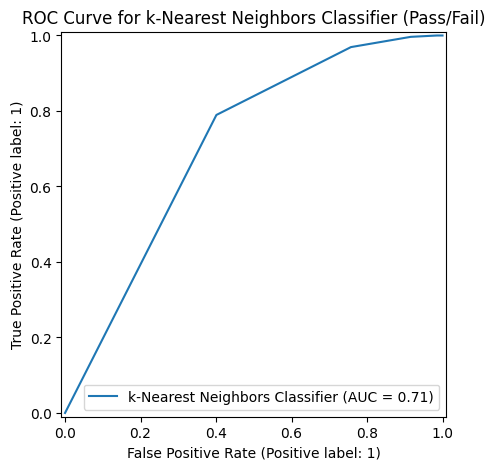

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Dictionary to store models for easier iteration
models_pass_fail = {
    "Logistic Regression": log_reg_pass_fail_model,
    "Decision Tree Classifier": decision_tree_pass_fail_model,
    "Random Forest Classifier": random_forest_pass_fail_model,
    "XGBoost Classifier": xgb_pass_fail_model,
    "Support Vector Classifier": svc_pass_fail_model,
    "k-Nearest Neighbors Classifier": knn_pass_fail_model
}

# Define target names for Pass/Fail based on the ordinal encoding ['Fail', 'Pass']
pass_fail_target_names = ['Fail', 'Pass']

print("--- Binary Classification Model Performance on Validation Set (Pass/Fail) ---")

for model_name, model in models_pass_fail.items():
    # Make predictions on the validation set
    y_pred = model.predict(X_val_pass_fail)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val_pass_fail, y_pred)
    precision = precision_score(y_val_pass_fail, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_val_pass_fail, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_val_pass_fail, y_pred, average='binary', zero_division=0)

    # Calculate AUC-ROC only for models that provide probability predictions
    auc_roc = "N/A"
    y_pred_proba = None # Initialize y_pred_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val_pass_fail)[:, 1] # Probability of the positive class (1=Pass)
        auc_roc = roc_auc_score(y_val_pass_fail, y_pred_proba)

    # Print the evaluation metrics
    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc_roc:.4f}" if isinstance(auc_roc, float) else f"  AUC-ROC: {auc_roc}")

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_val_pass_fail, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=pass_fail_target_names, yticklabels=pass_fail_target_names)
    plt.title(f'Confusion Matrix for {model_name} (Pass/Fail)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot ROC curve for binary classification
    if y_pred_proba is not None:
        plt.figure(figsize=(6, 5))
        RocCurveDisplay.from_predictions(y_val_pass_fail, y_pred_proba, name=model_name, ax=plt.gca())
        plt.title(f'ROC Curve for {model_name} (Pass/Fail)')
        plt.show()
    else:
        print("  ROC Curve not available (model does not support predict_proba).")

# Summarize Pass/Fail Model Performance

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary to store model performance metrics
performance_summary_clf_binary = {
    'Model': [
        'Logistic Regression',
        'Decision Tree Classifier',
        'Random Forest Classifier',
        'XGBoost Classifier',
        'Support Vector Classifier',
        'k-Nearest Neighbors Classifier'
    ],
    'Accuracy': [
        accuracy_score(y_val_pass_fail, log_reg_pass_fail_model.predict(X_val_pass_fail)),
        accuracy_score(y_val_pass_fail, decision_tree_pass_fail_model.predict(X_val_pass_fail)),
        accuracy_score(y_val_pass_fail, random_forest_pass_fail_model.predict(X_val_pass_fail)),
        accuracy_score(y_val_pass_fail, xgb_pass_fail_model.predict(X_val_pass_fail)),
        accuracy_score(y_val_pass_fail, svc_pass_fail_model.predict(X_val_pass_fail)),
        accuracy_score(y_val_pass_fail, knn_pass_fail_model.predict(X_val_pass_fail))
    ],
    'Precision': [
        precision_score(y_val_pass_fail, log_reg_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        precision_score(y_val_pass_fail, decision_tree_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        precision_score(y_val_pass_fail, random_forest_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        precision_score(y_val_pass_fail, xgb_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        precision_score(y_val_pass_fail, svc_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        precision_score(y_val_pass_fail, knn_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0)
    ],
    'Recall': [
        recall_score(y_val_pass_fail, log_reg_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        recall_score(y_val_pass_fail, decision_tree_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        recall_score(y_val_pass_fail, random_forest_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        recall_score(y_val_pass_fail, xgb_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        recall_score(y_val_pass_fail, svc_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        recall_score(y_val_pass_fail, knn_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0)
    ],
    'F1-Score': [
        f1_score(y_val_pass_fail, log_reg_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        f1_score(y_val_pass_fail, decision_tree_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        f1_score(y_val_pass_fail, random_forest_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        f1_score(y_val_pass_fail, xgb_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        f1_score(y_val_pass_fail, svc_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0),
        f1_score(y_val_pass_fail, knn_pass_fail_model.predict(X_val_pass_fail), average='binary', zero_division=0)
    ],
    'AUC-ROC': [
        roc_auc_score(y_val_pass_fail, log_reg_pass_fail_model.predict_proba(X_val_pass_fail)[:, 1]),
        roc_auc_score(y_val_pass_fail, decision_tree_pass_fail_model.predict_proba(X_val_pass_fail)[:, 1]),
        roc_auc_score(y_val_pass_fail, random_forest_pass_fail_model.predict_proba(X_val_pass_fail)[:, 1]),
        roc_auc_score(y_val_pass_fail, xgb_pass_fail_model.predict_proba(X_val_pass_fail)[:, 1]),
        roc_auc_score(y_val_pass_fail, svc_pass_fail_model.predict_proba(X_val_pass_fail)[:, 1]),
        roc_auc_score(y_val_pass_fail, knn_pass_fail_model.predict_proba(X_val_pass_fail)[:, 1])
    ]
}

# Create a DataFrame from the summary dictionary
performance_df_clf_binary = pd.DataFrame(performance_summary_clf_binary)

# Sort by F1-Score (descending) to find the best model
performance_df_clf_binary_sorted = performance_df_clf_binary.sort_values(by='F1-Score', ascending=False)

print("\n--- Binary Classification Model Performance Summary on Validation Set (Pass/Fail) ---")
print(performance_df_clf_binary_sorted.to_string(index=False))

# Identify the best performing model
best_model_row_clf_binary = performance_df_clf_binary_sorted.iloc[0]
print(f"\nBest Performing Model: {best_model_row_clf_binary['Model']} with F1-Score of {best_model_row_clf_binary['F1-Score']:.4f}, Accuracy of {best_model_row_clf_binary['Accuracy']:.4f}, Precision of {best_model_row_clf_binary['Precision']:.4f}, Recall of {best_model_row_clf_binary['Recall']:.4f}, and AUC-ROC of {best_model_row_clf_binary['AUC-ROC']:.4f}")


--- Binary Classification Model Performance Summary on Validation Set (Pass/Fail) ---
                         Model  Accuracy  Precision   Recall  F1-Score  AUC-ROC
           Logistic Regression  0.951000   0.962008 0.986419  0.974060 0.955253
     Support Vector Classifier  0.948000   0.954890 0.991065  0.972641 0.954432
            XGBoost Classifier  0.945333   0.956974 0.985704  0.971127 0.939593
      Random Forest Classifier  0.942000   0.942645 0.998570  0.969802 0.929944
k-Nearest Neighbors Classifier  0.935000   0.937773 0.996426  0.966210 0.711464
      Decision Tree Classifier  0.912333   0.958409 0.947105  0.952723 0.688899

Best Performing Model: Logistic Regression with F1-Score of 0.9741, Accuracy of 0.9510, Precision of 0.9620, Recall of 0.9864, and AUC-ROC of 0.9553


# Hyperparameter Tuning for Pass/Fail's Best Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['liblinear', 'lbfgs'] # Algorithm to use in the optimization problem
}

# Instantiate LogisticRegression with fixed parameters
log_reg_base_model = LogisticRegression(random_state=42, max_iter=1000)

# Instantiate GridSearchCV
# Using cv=3 for quicker execution, in practice, a higher cv (e.g., 5 or 10) might be preferred.
grid_search_lr = GridSearchCV(
    estimator=log_reg_base_model,
    param_grid=param_grid_lr,
    cv=3,
    scoring='f1', # Use f1 score for binary classification evaluation
    verbose=1,
    n_jobs=-1 # Use all available cores
)

# Fit GridSearchCV to the training data
print("Starting GridSearchCV for Logistic Regression...")
grid_search_lr.fit(X_train_pass_fail, y_train_pass_fail)

print("GridSearchCV completed.")

# Print the best parameters and best score
print("\nBest parameters found:", grid_search_lr.best_params_)
print("Best F1 score found:", grid_search_lr.best_score_)

Starting GridSearchCV for Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
GridSearchCV completed.

Best parameters found: {'C': 0.1, 'solver': 'liblinear'}
Best F1 score found: 0.9726378899775597


# Error Analysis for Pass/Fail's Best Model

Best Logistic Regression model retrieved from GridSearchCV.


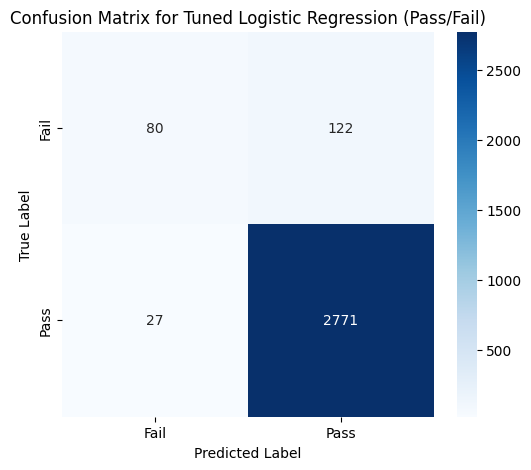


Classification Report for Tuned Logistic Regression (Pass/Fail):
              precision    recall  f1-score   support

        Fail       0.75      0.40      0.52       202
        Pass       0.96      0.99      0.97      2798

    accuracy                           0.95      3000
   macro avg       0.85      0.69      0.75      3000
weighted avg       0.94      0.95      0.94      3000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Retrieve the best estimator from the grid_search_lr object
best_log_reg_model_pass_fail = grid_search_lr.best_estimator_
print("Best Logistic Regression model retrieved from GridSearchCV.")

# 2. Make predictions on the validation set
y_pred_best_log_reg_pass_fail = best_log_reg_model_pass_fail.predict(X_val_pass_fail)

# 3. Generate and print the confusion matrix
cm_pass_fail = confusion_matrix(y_val_pass_fail, y_pred_best_log_reg_pass_fail)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_pass_fail, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix for Tuned Logistic Regression (Pass/Fail)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4. Generate and print the classification report
print("\nClassification Report for Tuned Logistic Regression (Pass/Fail):")
print(classification_report(y_val_pass_fail, y_pred_best_log_reg_pass_fail, target_names=['Fail', 'Pass'], zero_division=0))

# Analyze final_grade_encoded Class Distribution

## Analyze final_grade_encoded Class Distribution


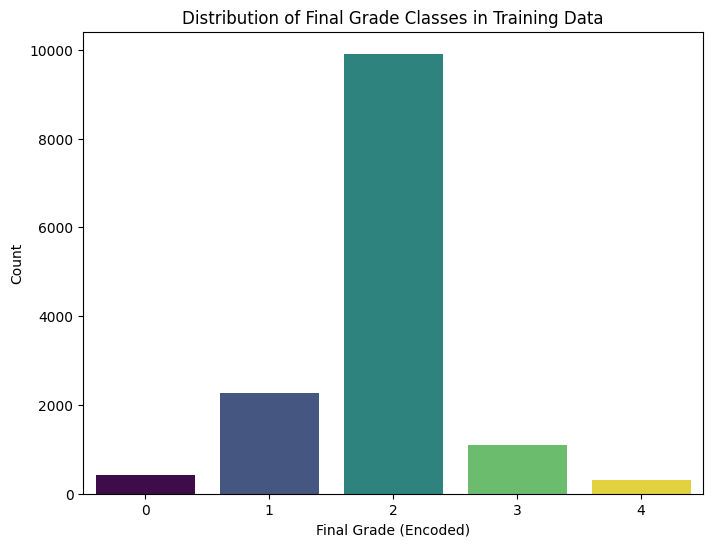

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Re-define X_grade and y_grade from df_encoded
X_grade = df_encoded.drop(columns=['final_score', 'final_grade_encoded', 'pass_fail_encoded'])
y_grade = df_encoded['final_grade_encoded']

# Re-split the data to ensure y_train_grade is defined
X_train_grade, X_temp_grade, y_train_grade, y_temp_grade = train_test_split(X_grade, y_grade, test_size=0.30, random_state=42, stratify=y_grade)

# Create a count plot of the y_train_grade Series
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_grade, palette='viridis', hue=y_train_grade, legend=False)
plt.title('Distribution of Final Grade Classes in Training Data')
plt.xlabel('Final Grade (Encoded)')
plt.ylabel('Count')
plt.show()

## Apply SMOTE and Calculate Class Weights

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from collections import Counter

# Inspect original distribution
original_counts = Counter(y_train_grade)
print("Original class distribution:", original_counts)

# Identify majority class (C)
majority_class = max(original_counts, key=original_counts.get)
majority_count = original_counts[majority_class]

# Create custom SMOTE strategy
sampling_strategy = {}

for cls, count in original_counts.items():
    if cls != majority_class:
        target = int(0.6 * majority_count)
        if count < target:
            sampling_strategy[cls] = target

print("Custom SMOTE target distribution:", sampling_strategy)

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

X_resampled_grade, y_resampled_grade = smote.fit_resample(X_train_grade, y_train_grade)

print("New class distribution:", Counter(y_resampled_grade))

# Compute class weights AFTER SMOTE
classes = np.unique(y_resampled_grade)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_resampled_grade)
class_weights_grade = dict(zip(classes, weights))

print("Final class weights:", class_weights_grade)


Original class distribution: Counter({2: 9911, 1: 2275, 3: 1093, 0: 418, 4: 303})
Custom SMOTE target distribution: {1: 5946, 4: 5946, 0: 5946, 3: 5946}
New class distribution: Counter({2: 9911, 1: 5946, 4: 5946, 0: 5946, 3: 5946})
Final class weights: {np.int64(0): np.float64(1.1333669693911874), np.int64(1): np.float64(1.1333669693911874), np.int64(2): np.float64(0.6799515689637776), np.int64(3): np.float64(1.1333669693911874), np.int64(4): np.float64(1.1333669693911874)}


## Retrain Classification Models for Final Grade with Balancing


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Train Logistic Regression model with class weights and resampled data
log_reg_model_balanced = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000, class_weight=class_weights_grade)
log_reg_model_balanced.fit(X_resampled_grade, y_resampled_grade)
print("Logistic Regression model (balanced) trained successfully.")

# Train Decision Tree Classifier model with class weights and resampled data
decision_tree_model_balanced = DecisionTreeClassifier(random_state=42, class_weight=class_weights_grade)
decision_tree_model_balanced.fit(X_resampled_grade, y_resampled_grade)
print("Decision Tree Classifier model (balanced) trained successfully.")

# Train Random Forest Classifier model with class weights and resampled data
random_forest_clf_model_balanced = RandomForestClassifier(random_state=42, class_weight=class_weights_grade)
random_forest_clf_model_balanced.fit(X_resampled_grade, y_resampled_grade)
print("Random Forest Classifier model (balanced) trained successfully.")

# Train XGBoost Classifier model with class weights and resampled data
sample_weights_xgb = np.array([class_weights_grade[cls] for cls in y_resampled_grade])
xgb_clf_model_balanced = XGBClassifier(random_state=42, eval_metric='mlogloss', objective='multi:softmax')
xgb_clf_model_balanced.fit(X_resampled_grade, y_resampled_grade, sample_weight=sample_weights_xgb)
print("XGBoost Classifier model (balanced) trained successfully.")
'''
# Support Vector Classifier model with class weights and resampled data
svc_grade_model_balanced = SVC(random_state=42, kernel='linear', class_weight=class_weights_grade, probability=True)
svc_grade_model_balanced.fit(X_resampled_grade, y_resampled_grade)
print("Support Vector Classifier model (balanced) trained successfully.")
'''
# k-Nearest Neighbors Classifier model (does not support class_weight directly, uses resampled data only)
knn_grade_model_balanced = KNeighborsClassifier(n_neighbors=5)
knn_grade_model_balanced.fit(X_resampled_grade, y_resampled_grade)
print("k-Nearest Neighbors Classifier model (balanced) trained successfully.")

Logistic Regression model (balanced) trained successfully.
Decision Tree Classifier model (balanced) trained successfully.
Random Forest Classifier model (balanced) trained successfully.
XGBoost Classifier model (balanced) trained successfully.
k-Nearest Neighbors Classifier model (balanced) trained successfully.


## Evaluate Balanced Classification Models for Final Grade

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to store predictions and model names for easier iteration
models_balanced = {
    "Logistic Regression (Balanced)": log_reg_model_balanced,
    "Decision Tree Classifier (Balanced)": decision_tree_model_balanced,
    "Random Forest Classifier (Balanced)": random_forest_clf_model_balanced,
    "XGBoost Classifier (Balanced)": xgb_clf_model_balanced,
    "k-Nearest Neighbors Classifier (Balanced)": knn_grade_model_balanced
}

print("--- Balanced Classification Model Performance on Validation Set (Final Grade) ---")

for model_name, model in models_balanced.items():
    # Make predictions on the validation set
    y_pred = model.predict(X_val_grade)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val_grade, y_pred)
    precision = precision_score(y_val_grade, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_val_grade, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_val_grade, y_pred, average='weighted', zero_division=0)

    # Print the evaluation metrics
    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")

--- Balanced Classification Model Performance on Validation Set (Final Grade) ---

Logistic Regression (Balanced):
  Accuracy: 0.4517
  Precision: 0.6364
  Recall: 0.4517
  F1-Score: 0.4888

Decision Tree Classifier (Balanced):
  Accuracy: 0.4933
  Precision: 0.5727
  Recall: 0.4933
  F1-Score: 0.5244

Random Forest Classifier (Balanced):
  Accuracy: 0.6697
  Precision: 0.5853
  Recall: 0.6697
  F1-Score: 0.6033

XGBoost Classifier (Balanced):
  Accuracy: 0.6580
  Precision: 0.5892
  Recall: 0.6580
  F1-Score: 0.6095

k-Nearest Neighbors Classifier (Balanced):
  Accuracy: 0.2520
  Precision: 0.5707
  Recall: 0.2520
  F1-Score: 0.2674


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store performance metrics for balanced models
performance_summary_clf_balanced = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Iterate through the balanced models to collect metrics
for model_name, model in models_balanced.items():
    y_pred = model.predict(X_val_grade)

    accuracy = accuracy_score(y_val_grade, y_pred)
    precision = precision_score(y_val_grade, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_val_grade, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_val_grade, y_pred, average='weighted', zero_division=0)

    performance_summary_clf_balanced['Model'].append(model_name)
    performance_summary_clf_balanced['Accuracy'].append(accuracy)
    performance_summary_clf_balanced['Precision'].append(precision)
    performance_summary_clf_balanced['Recall'].append(recall)
    performance_summary_clf_balanced['F1-Score'].append(f1)

# Create a DataFrame from the summary dictionary
performance_df_clf_balanced = pd.DataFrame(performance_summary_clf_balanced)

# Sort by F1-Score (descending) to find the best model
performance_df_clf_balanced_sorted = performance_df_clf_balanced.sort_values(by='F1-Score', ascending=False)

print("\n--- Balanced Classification Model Performance Summary on Validation Set (Final Grade) ---")
print(performance_df_clf_balanced_sorted.to_string(index=False))

# Identify the best performing model
best_model_row_clf_balanced = performance_df_clf_balanced_sorted.iloc[0]
print(f"\nBest Performing Model: {best_model_row_clf_balanced['Model']} with F1-Score of {best_model_row_clf_balanced['F1-Score']:.4f}, Accuracy of {best_model_row_clf_balanced['Accuracy']:.4f}, Precision of {best_model_row_clf_balanced['Precision']:.4f}, and Recall of {best_model_row_clf_balanced['Recall']:.4f}")


--- Balanced Classification Model Performance Summary on Validation Set (Final Grade) ---
                                    Model  Accuracy  Precision   Recall  F1-Score
            XGBoost Classifier (Balanced)  0.658000   0.589196 0.658000  0.609456
      Random Forest Classifier (Balanced)  0.669667   0.585302 0.669667  0.603318
      Decision Tree Classifier (Balanced)  0.493333   0.572668 0.493333  0.524425
           Logistic Regression (Balanced)  0.451667   0.636350 0.451667  0.488817
k-Nearest Neighbors Classifier (Balanced)  0.252000   0.570743 0.252000  0.267352

Best Performing Model: XGBoost Classifier (Balanced) with F1-Score of 0.6095, Accuracy of 0.6580, Precision of 0.5892, and Recall of 0.6580


## Error Analysis for Final Grade's Best Model (XGBoost Classifier with SMOTE)

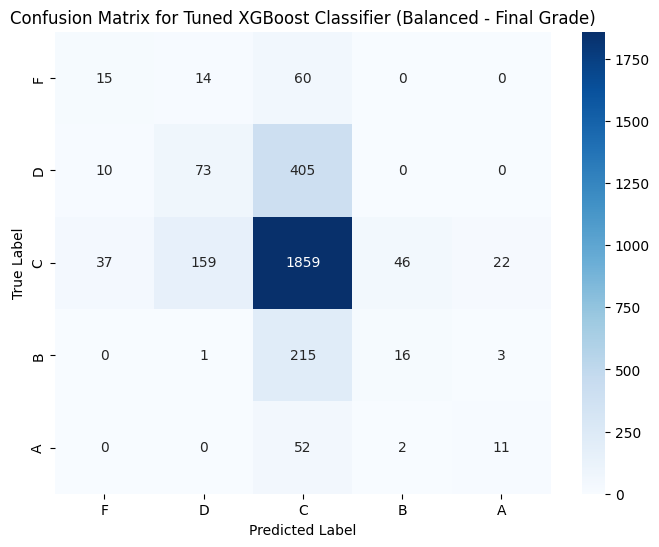


Classification Report for Tuned XGBoost Classifier (Balanced - Final Grade):
              precision    recall  f1-score   support

           F       0.24      0.17      0.20        89
           D       0.30      0.15      0.20       488
           C       0.72      0.88      0.79      2123
           B       0.25      0.07      0.11       235
           A       0.31      0.17      0.22        65

    accuracy                           0.66      3000
   macro avg       0.36      0.29      0.30      3000
weighted avg       0.59      0.66      0.61      3000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the validation set
y_pred_xgb_balanced_grade = xgb_clf_model_balanced.predict(X_val_grade)

# Generate a confusion matrix
cm_xgb_balanced_grade = confusion_matrix(y_val_grade, y_pred_xgb_balanced_grade)

# Define target names based on the grade order ['F', 'D', 'C', 'B', 'A']
grade_target_names = ['F', 'D', 'C', 'B', 'A']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_balanced_grade, annot=True, fmt='d', cmap='Blues',
            xticklabels=grade_target_names, yticklabels=grade_target_names)
plt.title('Confusion Matrix for Tuned XGBoost Classifier (Balanced - Final Grade)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print a classification report
print("\nClassification Report for Tuned XGBoost Classifier (Balanced - Final Grade):")
print(classification_report(y_val_grade, y_pred_xgb_balanced_grade, target_names=grade_target_names, zero_division=0))

## Create a Prediction Function


In [ ]:
import pandas as pd
import numpy as np

def predict_all_targets(input_features: pd.DataFrame) -> dict:
    """
    Predicts final score, final grade, and pass/fail status for given input features.

    Args:
        input_features (pd.DataFrame): A DataFrame containing the 38 features
                                       in their original, unscaled format.
                                       Column names must match the original dataset.

    Returns:
        dict: A dictionary containing predictions for 'final_score', 'final_grade',
              and 'pass_fail'.
    """

    # Ensure input_features have the same columns as X_train, and in the same order
    # This assumes that X_train was derived directly from df_encoded after preprocessing.
    # We need to re-create X_train's column list, excluding target variables and any OHE columns from initial X.

    # Identify the feature columns used for training (from df_encoded before targets)
    training_features_cols = X_train.columns.tolist()

    # Ensure input_features have all necessary columns, create dummy for missing OHE columns if any
    # And drop any extra columns not in training_features_cols
    processed_input_features = input_features.reindex(columns=training_features_cols, fill_value=0)

    # Apply scaling to numerical features (same columns as 'features_to_scale')
    # The 'scaler' object is assumed to be available from previous execution
    input_scaled_features = processed_input_features[features_to_scale].copy()
    input_scaled_features = pd.DataFrame(scaler.transform(input_scaled_features),
                                         columns=features_to_scale,
                                         index=input_scaled_features.index)

    # Recombine scaled numerical features with binary one-hot encoded features
    # Binary OHE features (gender_Male, part_time_job_Yes, course_type_Mandatory) were not scaled
    for col in binary_cols:
        input_scaled_features[col] = processed_input_features[col]

    # Ensure the order of columns matches what the models expect
    final_input_for_models = input_scaled_features[training_features_cols]

    # Make Predictions

    # 1. Predict Final Score (Regression - Gradient Boosting Regressor)
    final_score_pred = gradient_boosting_reg_model.predict(final_input_for_models)[0]

    # 2. Predict Final Grade (Multiclass Classification - XGBoost Classifier Balanced)
    final_grade_encoded_pred = xgb_clf_model_balanced.predict(final_input_for_models)[0]
    # Inverse transform to get original grade label
    # grade_order = ['F', 'D', 'C', 'B', 'A']
    final_grade_pred = grade_order[final_grade_encoded_pred]

    # 3. Predict Pass/Fail (Binary Classification - Logistic Regression Pass/Fail)
    pass_fail_encoded_pred = log_reg_pass_fail_model.predict(final_input_for_models)[0]
    # Inverse transform to get original pass/fail label
    # pass_fail_order = ['Fail', 'Pass']
    pass_fail_pred = pass_fail_order[pass_fail_encoded_pred]

    return {
        'final_score': final_score_pred,
        'final_grade': final_grade_pred,
        'pass_fail': pass_fail_pred
    }

print("Prediction function 'predict_all_targets' created successfully.")

Prediction function 'predict_all_targets' created successfully.


## User Interactive Prediction Interface

In [ ]:
# Identify the feature columns used for training (from df_encoded before targets)
# This needs to be defined globally for both the prediction function and example usage
training_features_cols = X_train.columns.tolist()

print("Global variable 'training_features_cols' defined successfully.")

Global variable 'training_features_cols' defined successfully.


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'training_features_cols', 'nominal_features', 'binary_cols', 'grade_order', 'pass_fail_order' are defined
# and 'predict_all_targets' function, 'scaler', and all models are available in the current environment.

user_input_data = {}

print("Please enter the details for the student:")

# Define the expected types for basic numerical columns to guide input
# This is a simplified approach; in a real application, you'd have more robust type checking.
numerical_cols_type_mapping = {
    'age': float, 'parent_income': float, 'num_siblings': float, 'family_support': float,
    'commute_time_min': float, 'previous_gpa': float, 'num_failed_courses': float,
    'high_school_grade': float, 'math_background_score': float, 'language_background_score': float,
    'science_background_score': float, 'prior_semester_credits': float, 'study_hours_last_semester': float,
    'past_attendance_rate': float, 'academic_warnings_count': float, 'lecture_attendance_rate': float,
    'assignment_submission_rate': float, 'quiz_avg_score': float, 'midterm_score': float,
    'lab_participation_rate': float, 'online_portal_usage_minutes': float, 'group_project_activity': float,
    'library_visits_per_month': float, 'discussion_forum_posts': float, 'lateness_count': float,
    'stress_level': float, 'sleep_hours': float, 'motivation_level': float,
    'study_time_per_week': float, 'concentration_level': float, 'exam_anxiety_level': float,
    'course_difficulty_rating': float, 'teacher_experience_years': float, 'class_size': float,
    'num_prerequisites': float
}

# Collect input for original features (before one-hot encoding)
# This will later be used to generate the one-hot encoded features
original_feature_values = {}

for feature in numerical_cols_type_mapping.keys():
    while True:
        try:
            value = input(f"Enter {feature.replace('_', ' ').title()}: ")
            original_feature_values[feature] = numerical_cols_type_mapping[feature](value)
            break
        except ValueError:
            print("Invalid input. Please enter a numerical value.")

# Handle categorical features that were one-hot encoded
# nominal_features = ['gender', 'part_time_job', 'course_type']

# Gender
while True:
    gender_input = input("Enter Gender (Male/Female): ").strip().capitalize()
    if gender_input in ['Male', 'Female']:
        original_feature_values['gender'] = gender_input
        break
    else:
        print("Invalid input. Please enter 'Male' or 'Female'.")

# Part-time Job
while True:
    job_input = input("Has part-time job (Yes/No): ").strip().capitalize()
    if job_input in ['Yes', 'No']:
        original_feature_values['part_time_job'] = job_input
        break
    else:
        print("Invalid input. Please enter 'Yes' or 'No'.")

# Course Type
while True:
    course_input = input("Enter Course Type (Elective/Mandatory): ").strip().capitalize()
    if course_input in ['Elective', 'Mandatory']:
        original_feature_values['course_type'] = course_input
        break
    else:
        print("Invalid input. Please enter 'Elective' or 'Mandatory'.")

# Convert collected original feature values into a DataFrame format matching the original df
input_df_original_format = pd.DataFrame([original_feature_values])

# Prepare the input DataFrame for the predict_all_targets function
# This involves applying one-hot encoding for the nominal features
prepared_input_df = input_df_original_format.copy()
for col in nominal_features:
    prepared_input_df = pd.get_dummies(prepared_input_df, columns=[col], drop_first=True, dtype=int)

# Ensure all training_features_cols are present and in order, fill missing as 0
# This step is crucial because get_dummies might not create columns if a category is missing (e.g., if only 'Female' is present, 'gender_Male' won't be created)
final_input_for_prediction = pd.DataFrame(columns=training_features_cols, index=[0])
for col in training_features_cols:
    if col in prepared_input_df.columns:
        final_input_for_prediction[col] = prepared_input_df[col]
    else:
        final_input_for_prediction[col] = 0 # Default to 0 for missing OHE columns

# Make predictions using the defined function
predictions = predict_all_targets(final_input_for_prediction)

print("\n--- Predictions ---")
print(f"Predicted Final Score: {predictions['final_score']:.2f}")
print(f"Predicted Final Grade: {predictions['final_grade']}")
print(f"Predicted Pass/Fail: {predictions['pass_fail']}")

Please enter the details for the student:
Enter Age: 20
Enter Parent Income: 6000
Enter Num Siblings: 2
Enter Family Support: 2
Enter Commute Time Min: 345
Enter Previous Gpa: 3.2
Enter Num Failed Courses: 0
Enter High School Grade: 82
Enter Math Background Score: 80
Enter Language Background Score: 80
Enter Science Background Score: 75
Enter Prior Semester Credits: 18
Enter Study Hours Last Semester: 120
Enter Past Attendance Rate: 55
Enter Academic Warnings Count: 0
Enter Lecture Attendance Rate: 90
Enter Assignment Submission Rate: 99
Enter Quiz Avg Score: 99
Enter Midterm Score: 80
Enter Lab Participation Rate: 88
Enter Online Portal Usage Minutes: 1256
Enter Group Project Activity: 22
Enter Library Visits Per Month: 2
Enter Discussion Forum Posts: 16
Enter Lateness Count: 33
Enter Stress Level: 9
Enter Sleep Hours: 5
Enter Motivation Level: 8
Enter Study Time Per Week: 20
Enter Concentration Level: 8
Enter Exam Anxiety Level: 9
Enter Course Difficulty Rating: 8
Enter Teacher Exper

In [ ]:
import joblib

# Dictionary to store model names and their corresponding objects
# Regression models for 'final_score'
regression_models_to_save = {
    'linear_reg_model': linear_reg_model,
    'random_forest_reg_model': random_forest_reg_model,
    'xgb_reg_model': xgb_reg_model,
    'knn_reg_model': knn_reg_model,
    'svr_model': svr_model,
    'gradient_boosting_reg_model': gradient_boosting_reg_model
}

# Classification models for 'final_grade_encoded' (unbalanced and balanced)
classification_grade_models_to_save = {
    'log_reg_model': log_reg_model,
    'decision_tree_model': decision_tree_model,
    'random_forest_clf_model': random_forest_clf_model,
    'xgb_clf_model': xgb_clf_model,
    'svc_grade_model': svc_grade_model,
    'knn_grade_model': knn_grade_model,
    'log_reg_model_balanced': log_reg_model_balanced,
    'decision_tree_model_balanced': decision_tree_model_balanced,
    'random_forest_clf_model_balanced': random_forest_clf_model_balanced,
    'xgb_clf_model_balanced': xgb_clf_model_balanced,
    'knn_grade_model_balanced': knn_grade_model_balanced
}

# Classification models for 'pass_fail_encoded'
classification_pass_fail_models_to_save = {
    'log_reg_pass_fail_model': log_reg_pass_fail_model,
    'decision_tree_pass_fail_model': decision_tree_pass_fail_model,
    'random_forest_pass_fail_model': random_forest_pass_fail_model,
    'xgb_pass_fail_model': xgb_pass_fail_model,
    'svc_pass_fail_model': svc_pass_fail_model,
    'knn_pass_fail_model': knn_pass_fail_model,
    'best_log_reg_model_pass_fail': best_log_reg_model_pass_fail
}

print("Saving Regression Models for 'final_score'...")
for model_name, model_obj in regression_models_to_save.items():
    filename = f"{model_name}.pkl"
    joblib.dump(model_obj, filename)
    print(f"  Saved {filename}")
print("All Regression Models for 'final_score' saved successfully.\n")

print("Saving Classification Models for 'final_grade_encoded'...")
for model_name, model_obj in classification_grade_models_to_save.items():
    filename = f"{model_name}.pkl"
    joblib.dump(model_obj, filename)
    print(f"  Saved {filename}")
print("All Classification Models for 'final_grade_encoded' saved successfully.\n")

print("Saving Classification Models for 'pass_fail_encoded'...")
for model_name, model_obj in classification_pass_fail_models_to_save.items():
    filename = f"{model_name}.pkl"
    joblib.dump(model_obj, filename)
    print(f"  Saved {filename}")
print("All Classification Models for 'pass_fail_encoded' saved successfully.")


Saving Regression Models for 'final_score'...
  Saved linear_reg_model.pkl
  Saved random_forest_reg_model.pkl
  Saved xgb_reg_model.pkl
  Saved knn_reg_model.pkl
  Saved svr_model.pkl
  Saved gradient_boosting_reg_model.pkl
All Regression Models for 'final_score' saved successfully.

Saving Classification Models for 'final_grade_encoded'...
  Saved log_reg_model.pkl
  Saved decision_tree_model.pkl
  Saved random_forest_clf_model.pkl
  Saved xgb_clf_model.pkl
  Saved svc_grade_model.pkl
  Saved knn_grade_model.pkl
  Saved log_reg_model_balanced.pkl
  Saved decision_tree_model_balanced.pkl
  Saved random_forest_clf_model_balanced.pkl
  Saved xgb_clf_model_balanced.pkl
  Saved knn_grade_model_balanced.pkl
All Classification Models for 'final_grade_encoded' saved successfully.

Saving Classification Models for 'pass_fail_encoded'...
  Saved log_reg_pass_fail_model.pkl
  Saved decision_tree_pass_fail_model.pkl
  Saved random_forest_pass_fail_model.pkl
  Saved xgb_pass_fail_model.pkl
  Save

In [ ]:
import joblib
import os
import pandas as pd
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
from sklearn.preprocessing import LabelBinarizer

# Importing models based on the kernel state. These should already be trained.
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier

# --- 1. Save all previously trained models ---
# Regression models for 'final_score'
joblib.dump(linear_reg_model, 'linear_reg_model_final_score.pkl')
joblib.dump(random_forest_reg_model, 'random_forest_reg_model_final_score.pkl')
joblib.dump(xgb_reg_model, 'xgb_reg_model_final_score.pkl')
joblib.dump(knn_reg_model, 'knn_reg_model_final_score.pkl')
joblib.dump(svr_model, 'svr_model_final_score.pkl')
joblib.dump(gradient_boosting_reg_model, 'gradient_boosting_reg_model_final_score.pkl')

print("All regression models for 'final_score' saved.")

# Classification models for 'final_grade_encoded' (including balanced versions if available)
joblib.dump(log_reg_model, 'log_reg_model_final_grade.pkl')
joblib.dump(decision_tree_model, 'decision_tree_model_final_grade.pkl')
joblib.dump(random_forest_clf_model, 'random_forest_clf_model_final_grade.pkl')
joblib.dump(xgb_clf_model, 'xgb_clf_model_final_grade.pkl')
joblib.dump(svc_grade_model, 'svc_model_final_grade.pkl')
joblib.dump(knn_grade_model, 'knn_model_final_grade.pkl')
joblib.dump(log_reg_model_balanced, 'log_reg_model_final_grade_balanced.pkl')
joblib.dump(decision_tree_model_balanced, 'decision_tree_model_final_grade_balanced.pkl')
joblib.dump(random_forest_clf_model_balanced, 'random_forest_clf_model_final_grade_balanced.pkl')
joblib.dump(xgb_clf_model_balanced, 'xgb_clf_model_final_grade_balanced.pkl')
joblib.dump(knn_grade_model_balanced, 'knn_model_final_grade_balanced.pkl')

print("All classification models for 'final_grade_encoded' saved.")

# Classification models for 'pass_fail_encoded'
joblib.dump(log_reg_pass_fail_model, 'log_reg_model_pass_fail.pkl')
joblib.dump(decision_tree_pass_fail_model, 'decision_tree_model_pass_fail.pkl')
joblib.dump(random_forest_pass_fail_model, 'random_forest_model_pass_fail.pkl')
joblib.dump(xgb_pass_fail_model, 'xgb_model_pass_fail.pkl')
joblib.dump(svc_pass_fail_model, 'svc_model_pass_fail.pkl')
joblib.dump(knn_pass_fail_model, 'knn_model_pass_fail.pkl')
joblib.dump(best_log_reg_model_pass_fail, 'best_log_reg_model_pass_fail_tuned.pkl')

print("All classification models for 'pass_fail_encoded' saved.")


# --- 2. Update model_files and model_descriptions for GUI ---
model_files = {
    # Regression Models for final_score
    "Linear Regression (Final Score)": "linear_reg_model_final_score.pkl",
    "Random Forest Regressor (Final Score)": "random_forest_reg_model_final_score.pkl",
    "XGBoost Regressor (Final Score)": "xgb_reg_model_final_score.pkl",
    "k-Nearest Neighbors Regressor (Final Score)": "knn_reg_model_final_score.pkl",
    "Support Vector Regressor (Final Score)": "svr_model_final_score.pkl",
    "Gradient Boosting Regressor (Final Score)": "gradient_boosting_reg_model_final_score.pkl",

    # Classification Models for final_grade_encoded
    "Logistic Regression (Final Grade)": "log_reg_model_final_grade.pkl",
    "Decision Tree Classifier (Final Grade)": "decision_tree_model_final_grade.pkl",
    "Random Forest Classifier (Final Grade)": "random_forest_clf_model_final_grade.pkl",
    "XGBoost Classifier (Final Grade)": "xgb_clf_model_final_grade.pkl",
    "Support Vector Classifier (Final Grade)": "svc_model_final_grade.pkl",
    "k-Nearest Neighbors Classifier (Final Grade)": "knn_model_final_grade.pkl",
    "Logistic Regression (Final Grade - Balanced)": "log_reg_model_final_grade_balanced.pkl",
    "Decision Tree Classifier (Final Grade - Balanced)": "decision_tree_model_final_grade_balanced.pkl",
    "Random Forest Classifier (Final Grade - Balanced)": "random_forest_clf_model_final_grade_balanced.pkl",
    "XGBoost Classifier (Final Grade - Balanced)": "xgb_clf_model_final_grade_balanced.pkl",
    "k-Nearest Neighbors Classifier (Final Grade - Balanced)": "knn_model_final_grade_balanced.pkl",

    # Classification Models for pass_fail_encoded
    "Logistic Regression (Pass/Fail)": "log_reg_model_pass_fail.pkl",
    "Decision Tree Classifier (Pass/Fail)": "decision_tree_model_pass_fail.pkl",
    "Random Forest Classifier (Pass/Fail)": "random_forest_model_pass_fail.pkl",
    "XGBoost Classifier (Pass/Fail)": "xgb_model_pass_fail.pkl",
    "Support Vector Classifier (Pass/Fail)": "svc_model_pass_fail.pkl",
    "k-Nearest Neighbors Classifier (Pass/Fail)": "knn_model_pass_fail.pkl",
    "Logistic Regression (Pass/Fail - Tuned)": "best_log_reg_model_pass_fail_tuned.pkl"
}

available_models = {}
for name, path in model_files.items():
    if os.path.exists(path):
        available_models[name] = joblib.load(path)
    else:
        print(f"Warning: Model file not found: {path}")

if len(available_models) == 0:
    raise Exception("No trained models found (.pkl files). Please ensure models are saved in the current directory.")

model_descriptions = {
    "Linear Regression (Final Score)": "Predicts final score using a linear relationship.",
    "Random Forest Regressor (Final Score)": "Ensemble model for regression, robust to outliers.",
    "XGBoost Regressor (Final Score)": "Gradient boosting framework for regression, high performance.",
    "k-Nearest Neighbors Regressor (Final Score)": "Non-parametric method that predicts based on the k-nearest data points.",
    "Support Vector Regressor (Final Score)": "Uses support vectors to find the best fit hyperplane.",
    "Gradient Boosting Regressor (Final Score)": "Builds an ensemble of weak prediction models, typically decision trees, iteratively.",

    "Logistic Regression (Final Grade)": "Baseline multi-class classifier for letter grades.",
    "Decision Tree Classifier (Final Grade)": "Tree-based model for classifying letter grades.",
    "Random Forest Classifier (Final Grade)": "Ensemble of decision trees for multi-class classification.",
    "XGBoost Classifier (Final Grade)": "Gradient boosting classifier for multi-class grades.",
    "Support Vector Classifier (Final Grade)": "Uses support vectors to classify letter grades.",
    "k-Nearest Neighbors Classifier (Final Grade)": "Classifies based on the majority class of k-nearest neighbors.",
    "Logistic Regression (Final Grade - Balanced)": "Multi-class classifier with class balancing (SMOTE + weights).",
    "Decision Tree Classifier (Final Grade - Balanced)": "Tree-based model for grades with class balancing.",
    "Random Forest Classifier (Final Grade - Balanced)": "Ensemble of decision trees for grades with class balancing.",
    "XGBoost Classifier (Final Grade - Balanced)": "Gradient boosting classifier for grades with class balancing.",
    "k-Nearest Neighbors Classifier (Final Grade - Balanced)": "KNN for grades with class balancing (resampled data).",

    "Logistic Regression (Pass/Fail)": "Baseline binary classifier for pass/fail status.",
    "Decision Tree Classifier (Pass/Fail)": "Tree-based model for pass/fail classification.",
    "Random Forest Classifier (Pass/Fail)": "Ensemble of decision trees for pass/fail classification.",
    "XGBoost Classifier (Pass/Fail)": "Gradient boosting classifier for pass/fail status.",
    "Support Vector Classifier (Pass/Fail)": "Uses support vectors to classify pass/fail status.",
    "k-Nearest Neighbors Classifier (Pass/Fail)": "Classifies based on the majority class of k-nearest neighbors.",
    "Logistic Regression (Pass/Fail - Tuned)": "Tuned binary classifier for pass/fail status, optimized for F1-score."
}

# --- 3. Use df_encoded as the primary DataFrame for the GUI and define global variables ---
df_for_gui = df_encoded.copy()

# --- 4. GUI Components ---
title = widgets.HTML("""
<h2 style="color:#154360;"> Interactive Machine Learning Project Dashboard</h2>
<p style="color:gray;">Select a target, features, and a model to evaluate predictions on the validation set.</p>
""")

target_options = [
    'final_score',
    'final_grade_encoded',
    'pass_fail_encoded'
]

target_dropdown = widgets.Dropdown(
    options=target_options,
    description="Target:",
    style={"description_width": "initial"}
)

feature_cols_for_selector = [col for col in df_for_gui.columns if col not in ['final_score', 'final_grade_encoded', 'pass_fail_encoded']]

feature_selector = widgets.SelectMultiple(
    options=feature_cols_for_selector,
    description="Features:",
    layout=widgets.Layout(height="160px", width="60%"),
    style={"description_width": "initial"}
)

model_dropdown = widgets.Dropdown(
    options=[],
    description="Model:",
    style={"description_width": "initial"}
)

model_info = widgets.HTML("<i style='color:gray;'>Model description</i>")

run_button = widgets.Button(
    description="Run Evaluation",
    button_style="success",
    icon="play"
)

status = widgets.HTML("<b style='color:gray;'>Status: Waiting</b>")
output = widgets.Output()

# --- 5. Update Callbacks ---
def update_features_and_models(change):
    current_target = change["new"]

    selectable_features = [col for col in df_for_gui.columns if col not in ['final_score', 'final_grade_encoded', 'pass_fail_encoded', current_target]]
    feature_selector.options = selectable_features

    new_selection = [f for f in feature_selector.value if f in selectable_features]
    feature_selector.value = new_selection if new_selection else selectable_features

    if current_target == 'final_score':
        model_dropdown.options = [name for name in available_models.keys() if "Regressor" in name]
    elif current_target in ['final_grade_encoded', 'pass_fail_encoded']:
        model_dropdown.options = [name for name in available_models.keys() if "Classifier" in name]
    else:
        model_dropdown.options = []

target_dropdown.observe(update_features_and_models, names="value")
update_features_and_models({"new": target_dropdown.value})

def update_model_info(change):
    model_info.value = f"<b>About this model:</b> {model_descriptions.get(change['new'], 'No description available.')}"

model_dropdown.observe(update_model_info, names="value")
update_model_info({"new": model_dropdown.value})


# --- 6. Main Evaluation Logic ---
def run_evaluation(b):
    output.clear_output()

    target_col = target_dropdown.value
    features = list(feature_selector.value)
    model_name = model_dropdown.value

    if len(features) == 0:
        status.value = "<b style='color:red;'>❌ Select at least one feature</b>"
        return

    status.value = "<b style='color:orange;'>Status: Evaluating...</b>"

    # Select appropriate validation data based on target
    X_eval, y_true = None, None
    task_type = None

    if target_col == 'final_score':
        X_eval = X_val[features]
        y_true = y_val
        task_type = 'regression'
    elif target_col == 'final_grade_encoded':
        X_eval = X_val_grade[features]
        y_true = y_val_grade
        task_type = 'classification_multi'
    elif target_col == 'pass_fail_encoded':
        X_eval = X_val_pass_fail[features]
        y_true = y_val_pass_fail
        task_type = 'classification_binary'
    else:
        status.value = "<b style='color:red;'> Invalid target selected</b>"
        return

    model = available_models[model_name]

    # Check for model type mismatch dynamically
    if task_type == 'regression' and "Regressor" not in model_name:
        status.value = "<b style='color:red;'> Selected model is not a regressor for a regression task.</b>"
        with output:
            display(HTML("<p style='color:red;'>Please select a REGRESSION model for 'final_score'.</p>"))
        return
    if task_type in ['classification_multi', 'classification_binary'] and "Classifier" not in model_name:
        status.value = "<b style='color:red;'> Selected model is not a classifier for a classification task.</b>"
        with output:
            display(HTML("<p style='color:red;'>Please select a CLASSIFICATION model for 'final_grade_encoded' or 'pass_fail_encoded'.</p>"))
        return

    y_pred = model.predict(X_eval)

    with output:
        display(widgets.HTML(f"<h3 style=\"color:#117864;\">Evaluation Results for {model_name} on {target_col.replace('_', ' ').title()}</h3>"))

        if task_type == 'regression':
            mse = mean_squared_error(y_true, y_pred)
            mae = mean_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)

            display(widgets.HTML(f"""
            <ul>
                <li><b>Mean Squared Error (MSE):</b> {mse:.4f}</li>
                <li><b>Mean Absolute Error (MAE):</b> {mae:.4f}</li>
                <li><b>R-squared (R2) Score:</b> {r2:.4f}</li>
            </ul>
            """))

            # ===== METRICS BAR (for Regression) =====
            plt.figure(figsize=(8, 5))
            plt.bar(["MSE", "MAE", "R2 Score"], [mse, mae, r2], color=['lightskyblue', 'lightcoral', 'lightgreen'])
            plt.title("Regression Metrics")
            plt.show()

            # Residuals plot
            residuals = y_true - y_pred
            plt.figure(figsize=(10, 5))
            sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
            plt.axhline(y=0, color='r', linestyle='--')
            plt.title('Residuals vs. Predicted Values')
            plt.xlabel('Predicted Final Score')
            plt.ylabel('Residuals')
            plt.show()

        elif task_type in ['classification_multi', 'classification_binary']:
            if target_col == 'final_grade_encoded':
                current_target_names = grade_order
                average_metric = 'weighted'
            elif target_col == 'pass_fail_encoded':
                current_target_names = pass_fail_order
                average_metric = 'binary'

            acc  = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, average=average_metric, zero_division=0)
            rec  = recall_score(y_true, y_pred, average=average_metric, zero_division=0)
            f1   = f1_score(y_true, y_pred, average=average_metric, zero_division=0)

            display(widgets.HTML(f"""
            <ul>
                <li><b>Accuracy:</b> {acc:.2%}</li>
                <li><b>Precision ({average_metric}):</b> {prec:.2%}</li>
                <li><b>Recall ({average_metric}):</b> {rec:.2%}</li>
                <li><b>F1-Score ({average_metric}):</b> {f1:.2%}</li>
            </ul>
            """))

            # ===== METRICS BAR (for Classification) =====
            plt.figure(figsize=(8, 5))
            plt.bar(["Accuracy", "Precision", "Recall", "F1"], [acc, prec, rec, f1], color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
            plt.ylim(0,1)
            plt.title("Classification Metrics")
            plt.show()

            # ===== CONFUSION MATRIX =====
            cm = confusion_matrix(y_true, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                        xticklabels=current_target_names, yticklabels=current_target_names)
            plt.title(f"Confusion Matrix for {model_name} ({target_col.replace('_', ' ').title()})")
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

            # ===== ROC CURVE (for models with predict_proba) =====
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(X_eval)

                plt.figure(figsize=(8, 6))
                if task_type == 'classification_binary': # Binary classification
                    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
                    roc_auc = auc(fpr, tpr)
                    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
                    plt.plot([0,1], [0,1], linestyle="--", color='gray', label='Chance level')
                    plt.title(f"ROC Curve for {model_name} (Binary)")

                elif task_type == 'classification_multi': # Multi-class classification (One-vs-Rest)
                    lb = LabelBinarizer()
                    y_true_binarized = lb.fit_transform(y_true)

                    model_classes_mapping = {cls: i for i, cls in enumerate(model.classes_)}
                    y_prob_aligned = np.zeros((y_prob.shape[0], len(lb.classes_)))

                    for true_class_idx, true_class_label in enumerate(lb.classes_):
                        if true_class_label in model_classes_mapping:
                            model_prob_idx = model_classes_mapping[true_class_label]
                            y_prob_aligned[:, true_class_idx] = y_prob[:, model_prob_idx]
                        # else: keep as zeros for missing classes

                    for i in range(len(lb.classes_)):
                        fpr_class, tpr_class, _ = roc_curve(y_true_binarized[:, i], y_prob_aligned[:, i])
                        roc_auc_class = auc(fpr_class, tpr_class)
                        plt.plot(fpr_class, tpr_class, label=f'ROC curve of class {current_target_names[i]} (area = {roc_auc_class:.2f})')

                    plt.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.50)')
                    plt.title(f'ROC Curve for {model_name} (One-vs-Rest)')

                plt.xlabel("False Positive Rate")
                plt.ylabel("True Positive Rate")
                plt.legend(loc="lower right")
                plt.grid(True)
                plt.show()
            else:
                display(widgets.HTML("<p style='color:orange;'><i>ROC Curve not available for this model (does not support predict_proba).</i></p>"))

    status.value = "<b style='color:green;'>Status: Completed ✔</b>"

run_button.on_click(run_evaluation)

# ===================== Display GUI =====================
display(
    widgets.VBox([
        title,
        target_dropdown,
        feature_selector,
        model_dropdown,
        model_info,
        run_button,
        status,
        output
    ])
)

All regression models for 'final_score' saved.
All classification models for 'final_grade_encoded' saved.
All classification models for 'pass_fail_encoded' saved.


# Advanced Additions (Stacking, Calibration, Explainability)

This section adds several advanced ML cells: stacking ensembles for each task, calibration and reliability analysis for probabilistic outputs, and SHAP-based explainability for tree models. Run these cells after the earlier preprocessing/training cells so `X`, `y`, and train/validation splits are available.

In [ ]:
# ===== Stacking Ensemble for Each Task =====
# Installs (only needed once)
#%pip install -q xgboost scikit-learn

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor, StackingClassifier
from sklearn.linear_model import RidgeCV, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import numpy as np

# Prepare data (re-split to ensure variables exist in this cell)
from sklearn.model_selection import train_test_split
# X is the DataFrame of features created earlier in the notebook
try:
    X_vals = X.values if hasattr(X, 'values') else X
except NameError:
    raise NameError('`X` not found. Run the preprocessing cells first to create `X` and target arrays.')

# targets: final_score (regression), final_grade (multi-class), pass_fail (binary)
y_score = df['final_score'].astype(np.float32).values
y_grade = y_grade.transform(df['final_grade']).astype(np.int32)
y_pass = y_pass.transform(df['pass_fail']).astype(np.int32)

X_tr, X_te, ys_tr, ys_te = train_test_split(X_vals, y_score, test_size=0.2, random_state=42)
_, _, yg_tr, yg_te = train_test_split(X_vals, y_grade, test_size=0.2, random_state=42)
_, _, yp_tr, yp_te = train_test_split(X_vals, y_pass, test_size=0.2, random_state=42)

# --- Regression stacking for final_score ---
reg_estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42))
]
stack_reg = StackingRegressor(estimators=reg_estimators, final_estimator=RidgeCV())
stack_reg.fit(X_tr, ys_tr)
pred_reg = stack_reg.predict(X_te)
rmse = mean_squared_error(ys_te, pred_reg, squared=False)
print(f'Regression Stacking RMSE (final_score): {rmse:.4f}')

# --- Classification stacking for final_grade (multi-class) ---
clf_estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, random_state=42))
]
stack_clf = StackingClassifier(estimators=clf_estimators, final_estimator=LogisticRegression(max_iter=1000), cv=5)
stack_clf.fit(X_tr, yg_tr)
pred_grade = stack_clf.predict(X_te)
print('Classification Stacking (final_grade)')
print(classification_report(yg_te, pred_grade))

# --- Classification stacking for pass_fail (binary) ---
stack_bin = StackingClassifier(estimators=clf_estimators, final_estimator=LogisticRegression(max_iter=1000), cv=5)
stack_bin.fit(X_tr, yp_tr)
pred_pass = stack_bin.predict(X_te)
print('Classification Stacking (pass_fail)')
print(classification_report(yp_te, pred_pass))

# Optionally save the stacking models
import joblib
joblib.dump({'stack_reg':stack_reg,'stack_grade':stack_clf,'stack_pass':stack_bin}, 'models/stacking_models.joblib')

In [ ]:
# ===== Calibration & Reliability Analysis =====
%pip install -q scikit-learn matplotlib
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt
import numpy as np

# Use the binary pass/fail stacking classifier from the previous cell (stack_bin)
try:
    probs = stack_bin.predict_proba(X_te)[:,1]
except NameError:
    raise NameError('`stack_bin` not found. Run the Stacking cell first.')

# Calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(yp_te, probs, n_bins=10)
plt.figure(figsize=(6,6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='stack_bin')
plt.plot([0,1], [0,1], 'k--', label='perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve (pass_fail)')
plt.legend()
plt.grid(True)
plt.show()

# Brier score
brier = brier_score_loss(yp_te, probs)
print(f'Brier score (pass_fail): {brier:.4f}')

# If calibration is poor, demonstrate CalibratedClassifierCV
calibrated = CalibratedClassifierCV(base_estimator=stack_bin, cv='prefit')
calibrated.fit(X_tr, yp_tr)
cal_probs = calibrated.predict_proba(X_te)[:,1]
brier_cal = brier_score_loss(yp_te, cal_probs)
print(f'Brier score (calibrated): {brier_cal:.4f}')

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
from google.colab import files
files.upload()
print("TensorFlow Version:", tf.__version__)

# ---------------- Load Data ----------------
# First, let's list the files to confirm the exact filename
print("Files in current directory:", os.listdir('/content')) # Changed to list /content explicitly

df = pd.read_csv("Term_Project_Dataset_20K.csv") # Updated path to absolute path
df = df.dropna(how="all")

targets = ["final_score","final_grade","pass_fail"]
df = df.dropna(subset=targets).reset_index(drop=True)

# ---------------- Handle Missing ----------------
for c in df.select_dtypes(include=[np.number]):
    df[c] = df[c].fillna(df[c].median())

for c in df.select_dtypes(exclude=[np.number]):
    df[c] = df[c].fillna(df[c].mode()[0])

# ---------------- Features ----------------
X = pd.get_dummies(df.drop(columns=targets), drop_first=True)
X = X.astype(np.float32)

# ---------------- Targets ----------------
y_score = df["final_score"].astype(np.float32).values

le_grade = LabelEncoder()
y_grade = le_grade.fit_transform(df["final_grade"]).astype(np.int32)

le_pass = LabelEncoder()
y_pass = le_pass.fit_transform(df["pass_fail"]).astype(np.float32).reshape(-1,1)

# ---------------- Split ----------------
X_train, X_val, y1t, y1v, y2t, y2v, y3t, y3v = train_test_split(
    X.values, y_score, y_grade, y_pass,
    test_size=0.2,
    random_state=42
)

input_dim = X_train.shape[1]
n_classes = len(le_grade.classes_)

# ---------------- Model ----------------
inp = layers.Input(shape=(input_dim,))
shared = layers.Dense(64, activation="relu")(inp)

# Regression head
r = layers.Dense(32, activation="relu")(shared)
out_score = layers.Dense(1, name="final_score")(r)

# Grade head
g = layers.Dense(32, activation="relu")(shared)
out_grade = layers.Dense(n_classes, activation="softmax", name="final_grade")(g)

# Pass/Fail head
p = layers.Dense(16, activation="relu")(shared)
out_pass = layers.Dense(1, activation="sigmoid", name="pass_fail")(p)

model = models.Model(inp, [out_score,out_grade,out_pass])

model.compile(
    optimizer="adam",
    loss=["mse","sparse_categorical_crossentropy","binary_crossentropy"],
    metrics={"final_score":"mae","final_grade":"accuracy","pass_fail":"accuracy"}
)

es = callbacks.EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True)

model.fit(
    X_train, [y1t,y2t,y3t],
    validation_data=(X_val,[y1v,y2v,y3v]),
    epochs=30,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

# ---------------- Save ----------------
os.makedirs("models", exist_ok=True)
model.save("models/multi_task_keras")
joblib.dump(
    {"le_grade":le_grade,"le_pass":le_pass,"features":X.columns.tolist()},
    "models/multi_task_meta.joblib"
)

# ---------------- Evaluation ----------------
res = model.evaluate(X_val,[y1v,y2v,y3v], verbose=0)
print("\nValidation Results:", res)

# ---------------- Demo Prediction ----------------
sample = X_val[0:1]
pred_score, pred_grade_probs, pred_pass_prob = model.predict(sample)

pred_grade_idx = np.argmax(pred_grade_probs, axis=1)[0]
pred_grade = le_grade.inverse_transform([pred_grade_idx])[0]

pred_pass_label = le_pass.inverse_transform([int(pred_pass_prob.squeeze() >= 0.5)])[0]

print("\nSample Predicted Score:", float(pred_score.squeeze()))
print("Sample Predicted Grade:", pred_grade)
print("Sample Predicted Pass Probability:", float(pred_pass_prob.squeeze()))
print("Sample Predicted Pass/Fail:", pred_pass_label)

print("\n*** DONE SUCCESSFULLY ***")
